<a href="https://colab.research.google.com/github/Isadorarv26/Isadorarv26/blob/main/Tarea_2_I%26N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EAE3709 APLICACIONES DE  MACHINE LEARNING EN ECONOMÍA <br>
1ER SEMESTRE 2025 <br>
INSTITUTO DE ECONOMÍA <br>
PONTIFICIA UNIVERSIDAD CATÓLICA DE CHILE


# **TAREA 2**


---


Profesor:
- Joaquín Pérez Lapillo

Ayudantes:

- Luis García B.
- Sebastián Hernández B.
- Oscar Herrera G.


**Complete sus datos:**

- Nombre y apellido:
  - `# Isadora Rosas`
  - `# Nicolás Salas`
- Usuario de GitHub (opcional):  `# Isadorarv26`


## Instrucciones

- Descargue el notebook y cárguelo en su Drive.
- Todas las preguntas deben ser contestadas en su notebook.
- Para que una pregunta esté correcta el código debe correr.
- Si es necesario, realice comentarios breves en su código explicando lo que está realizando o sus resultados.
- Una vez culminada su tarea, suba su notebook al buzón de tareas de Canvas.
- La fecha y hora límite de esta tarea es el _**viernes 30 de mayo a las 20:00 hrs**_.



### Distribución de puntaje


| Pregunta                        | Puntaje |
|--------------------------------|---------|
| Pregunta 1.0                   |    1    |
| Pregunta 1.1                   |    2    |
| Pregunta 1.2                   |    2    |
| Pregunta 1.3                   |    2    |
| Pregunta 1.4                   |    5    |
| Pregunta 1.5                   |    5    |
| Pregunta 1.6                   |    2    |
| Pregunta 1.7                   |    2    |
| Pregunta 1.8                   |    3    |
| Pregunta 1.9                   |    3    |
| Pregunta 1.10                   |    5    |
| Pregunta 1.11                   |    5    |
| Pregunta 1.12                   |    5    |
| Pregunta 1.13                   |    3    |
| Pregunta 1.13                   |    5    |
| Pregunta 2.0                   |    1    |
| Pregunta 2.1                   |    1    |
| Pregunta 2.2                   |    1    |
| Pregunta 2.3                   |    3    |
| Pregunta 2.4                   |    5    |
| Pregunta 2.5                   |    3    |
| Pregunta 2.6                   |    3    |
| Pregunta 2.7                   |    3    |
| Pregunta 2.8                   |    5    |
| Pregunta 2.9                   |    7    |
| Pregunta 2.10                   |    4    |
| Pregunta 2.11                   |    3    |
| Pregunta 2.12                   |    1    |
| Pregunta 2.13                   |    2    |
| Pregunta 2.14                   |    3    |
| Pregunta 2.15                   |    2    |
| Pregunta 2.16                   |    3    |

Total: 100 pts.


# 1. Clasificación

En esta pregunta trabajaremos con un _dataset_ que contiene información campañas de marketing de un banco portugués. La campaña se enfocó en llamadas telefónicas a distintos segmentos de clientes, de forma individualizada, con el objetivo incenitvar la toma depósitos por parte de los clientes.

El problema presentado en este ejecicio busca predecir si el cliente suscribirá (sí/no) un depósito a plazo.



A continuación, se despliega información oficial sobre el _dataset_:

| Variable Name | Role    | Type        | Description                                                                                                                               |
|---------------|---------|-------------|-------------------------------------------------------------------------------------------------------------------------------------------|
| age           | Feature | Integer     |     years of age                                                                                                                                      |
| job           | Feature | Categorical | type of job |
| marital       | Feature | Categorical | marital status                          |
| education     | Feature | Categorical | Education level         |
| default       | Feature | Binary      | has credit in default?                                                                                                                    |
| balance       | Feature | Integer     | average yearly balance in euros                                                                                                                    |
| housing       | Feature | Binary      | has housing loan?                                                                                                                         |
| loan          | Feature | Binary      | has personal loan?                                                                                                                        |
| contact       | Feature | Categorical | contact communication type                                                                         |
| day_of_week   | Feature | Date        | last contact day of the month (numeric)                                                                                                              |
| month         | Feature | Date        | last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')                                                          |
| duration*      | Feature | Integer     | last contact duration, in seconds (numeric).  |
| campaign      | Feature | Integer     | number of contacts performed during this campaign and for this client                                      |
| pdays         | Feature | Integer     | number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted) |
| previous      | Feature | Integer     | number of contacts performed before this campaign and for this client                                                                       |
| poutcome      | Feature | Categorical | outcome of the previous marketing campaign                                                |
| y             | Target  | Binary      | has the client subscribed a term deposit?                                                                                                 |


*Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.



En el sitio web [https://archive.ics.uci.edu/dataset/222/bank+marketing](https://archive.ics.uci.edu/dataset/222/bank+marketing) podrá encontrar información oficial del _dataset_.

Use el código otorgado a continuación para importar los datos.


In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets


## Exploratory Data Analysis (EDA)

### Pregunta 1.0

Concatene `X` e `y` en un dataframe consolidado.

Muestre las primeras cinco observaciones en el dataframe consolidado. Despliegue información sobre el tipo de variable de cada una de las columnas del dataframe y despliegue estadísticas descriptivas de las variables según su tipo.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.concat([X, y], axis=1)
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Pregunta 1.1

Identifique las columnas que presentan _missing values_ e indique el número de _missing values_ que poseen.

Impute los valores nulos con el método que estime conveniente, justificando su decisión.

In [ ]:
missing_values = df.isnull().sum()

missing_values[missing_values > 0]

,0
job,288
education,1857
contact,13020
poutcome,36959


In [ ]:
df_sin_missing = df.copy()
cat_cols = df_sin_missing.select_dtypes(include=['object']).columns
for col in cat_cols:
    if df_sin_missing[col].isnull().sum() > 0:
        mode = df_sin_missing[col].mode()[0]
        df_sin_missing[col].fillna(mode, inplace=True)


<ipython-input-6-fe51932303dd>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sin_missing[col].fillna(mode, inplace=True)


In [ ]:
df_sin_missing.isnull().sum().sum()

np.int64(0)




---


*Escriba* su respuesta en esta celda...


---

### Pregunta 1.2


Genere histogramas de las variables categóricas desagregando por la variable objetivo de interés. Interprete las relaciones que observa.

Responda: ¿Cuáles creen que son las variables categóricas más relevantes a la hora de determinar si el individuo hará un depósito?

In [ ]:
df_sin_missing.select_dtypes(include=['object'])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,cellular,may,failure,no
1,technician,single,secondary,no,yes,no,cellular,may,failure,no
2,entrepreneur,married,secondary,no,yes,yes,cellular,may,failure,no
3,blue-collar,married,secondary,no,yes,no,cellular,may,failure,no
4,blue-collar,single,secondary,no,no,no,cellular,may,failure,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,failure,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,failure,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,failure,no


In [ ]:
cols_cat = df_sin_missing.select_dtypes(include=['object']).columns #columnas de tipo object

In [ ]:
def plot_atr(col):
  sns.countplot(x=col, data=df_sin_missing, palette='hls', hue='y')
  plt.xticks(rotation=45)
  plt.show()

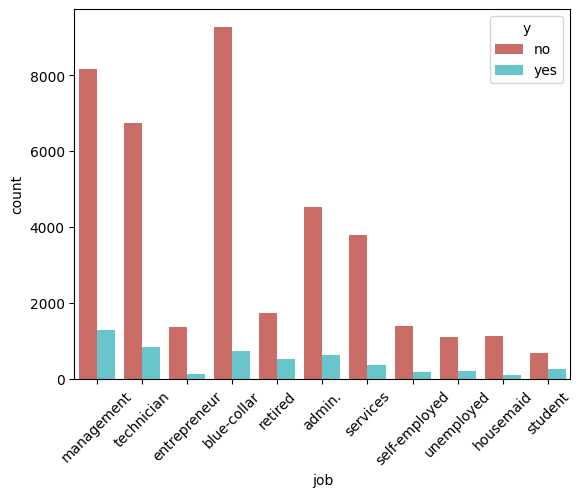

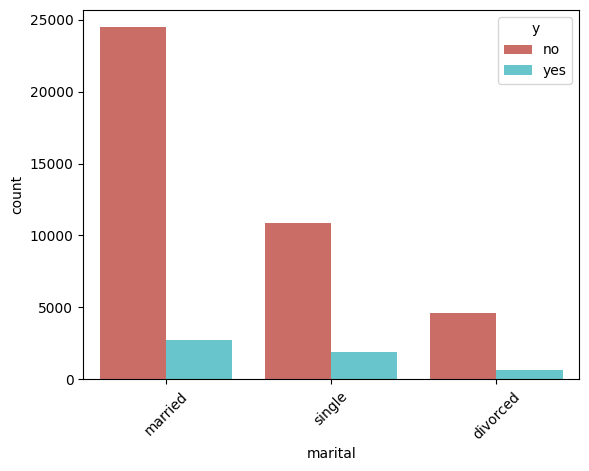

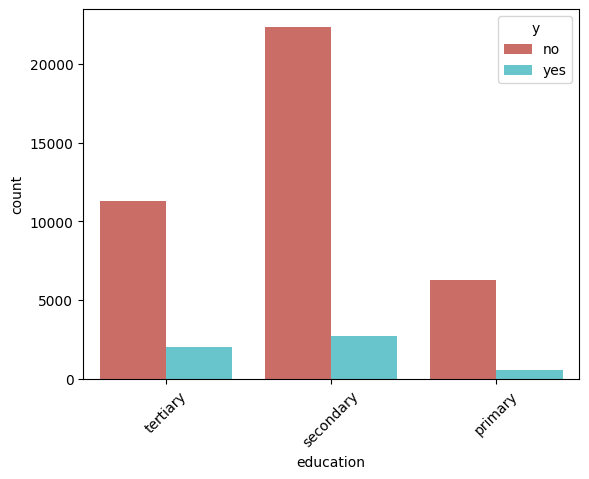

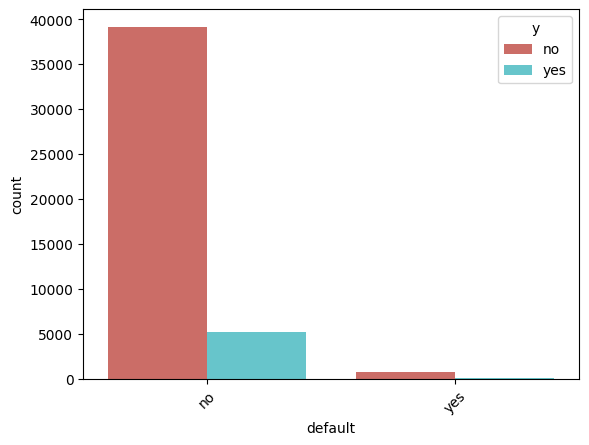

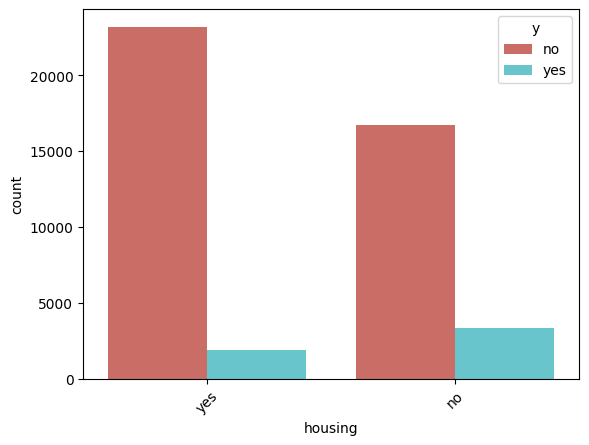

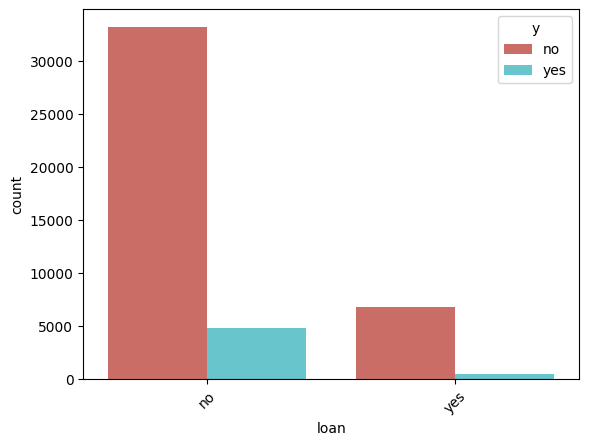

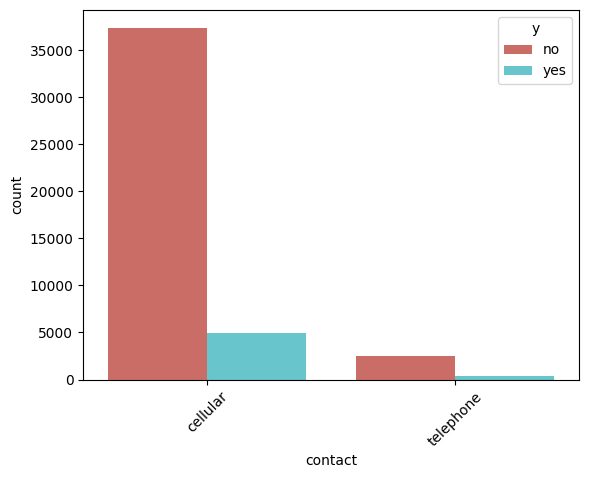

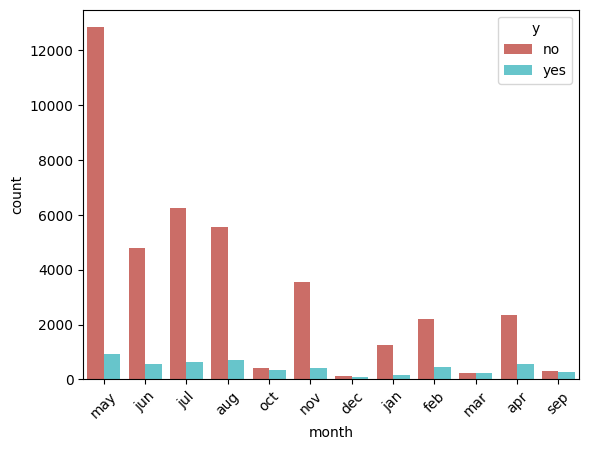

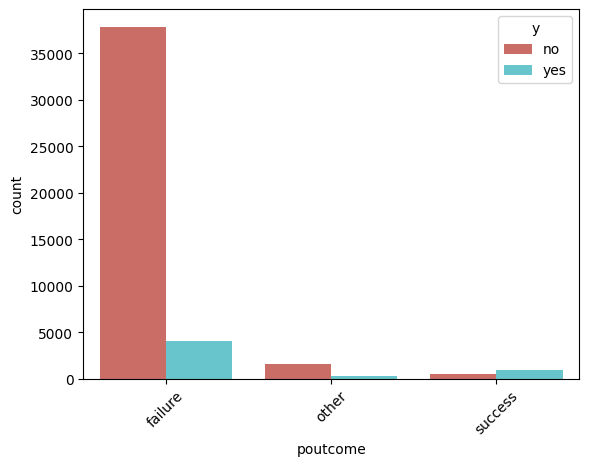

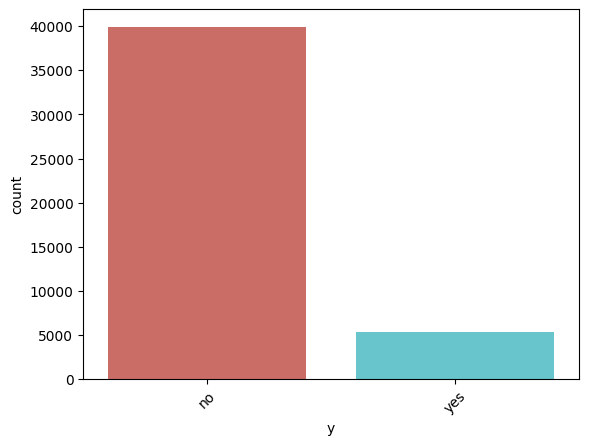

In [ ]:
for col in cols_cat:
  plot_atr(col)

In [ ]:
#cat_cols = [col for col in cat_cols if col != 'y']  # Excluir la variable objetivo


Creo que las variables más importantes podrían ser el empleo de la persona, si es autoempleado, estudiante, etc, ya que de alguna forma demuestra que tanto el individuo podría tener disponible para depositar. otra variable interesante podría ser crédito, pues personas que tengan un crédito podría ser indicativo de poca liquidez y por lo tanto una menor probabilidad de depositar.


---


*Escriba* su respuesta en esta celda...


---

### Pregunta 1.3

Identifique _outliers_ entre las variables numéricas del dataset. Además, impute estas observaciones si usted lo considera necesario. Justifique su decisión.

In [ ]:
#variables numericas
cols_num = df_sin_missing.select_dtypes(include=['int64', 'float64']).columns
cols_num

outliers_dict = {}

for col in cols_num:
    Q1 = df_sin_missing[col].quantile(0.25)
    Q3 = df_sin_missing[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_sin_missing[(df_sin_missing[col] < lower_bound) | (df_sin_missing[col] > upper_bound)]
    outliers_dict[col] = len(outliers)

#ver variables con outliers
for col, count in outliers_dict.items():
    if count > 0:
        print(f"{col}: {count} outliers")



age: 487 outliers
balance: 4729 outliers
duration: 3235 outliers
campaign: 3064 outliers
pdays: 8257 outliers
previous: 8257 outliers


In [ ]:
cols_winsorizar = ['age', 'balance', 'campaign', 'previous']

for col in cols_winsorizar:
    lower = df_sin_missing[col].quantile(0.01)
    upper = df_sin_missing[col].quantile(0.99)
    df_sin_missing[col] = df_sin_missing[col].clip(lower, upper)




---


Se identificaron los outliers, y se decidió imputar solo ciertos features mediante winsorización, ya que así no se eliminan datos, y es más suave que cambiarlos por la mediana, que podría sesgar, ya que en este caso son valores extremos pero no por errores de medición o algo, sino que son casos válidos de clientes.

---

## Feature Engineering

### Pregunta 1.4

 Cree un _pipeline_ de preprocesamiento con las siguientes transformaciones a las columnas correspondientes:

*   **Columnas Numéricas** : Aplique un `StandardScaler` para estandarizar estas variables.
*   **Columnas Categóricas Binarias** : Aplique `OneHotEncoder` para crear variables dummy. Asegúrese de manejar posibles categorías desconocidas durante la transformación.
*   **Columnas a Eliminar** : Elimine columnas que dejan de ser relavantes luego de las trasformaciones.
*  **Columnas Dummies MultiNivel** : cree columnas dummies para las variables multi categoricas (tomando codificadas a 0s y 1s =, para su respctiva categoria)
*  **Columnas Label Encoding MultiNivel** : Dentro de las columnas multinivel hay 2 columnas que presentan un orden natural. e.g. en la columna 'month' tenemos que 'jan' < 'feb' < 'dec'. Aplique en la columna 'month' y otra columna que deberá determinar usted un label encoder que capture ese ordenamiento natural, luego normalice con un minmax scaler para que las columnas varien entre 0 y 1.


Una vez creado el pipeline, aplíquelo a su conjunto de features (`X`). Muestre la forma (_shape_) del dataset original y del dataset procesado para verificar los cambios. ¿Cuántas nuevas columnas hay?

Adicionalmente, elimine del análisis la variable `day_of_week`. Si considera necesario realizar transformaciones adicionales a las variables, realicelas en este punto.




In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
import pandas as pd

# 1. Separar X e y
X = df_sin_missing.drop(columns=['y', 'day_of_week'])
y = df_sin_missing['y']

# 2. Crear listas de columnas
cols_num = df_sin_missing.select_dtypes(include=['int64', 'float64']).columns.tolist()
cols_cat = df_sin_missing.select_dtypes(include='object').columns.tolist()

# 3. Eliminar 'y' y 'day_of_week' de todas las listas
for lst in [cols_num, cols_cat]:
    for col in ['y', 'day_of_week']:
        if col in lst:
            lst.remove(col)

# 4. Columnas binarias
cols_bin = [col for col in cols_cat if df_sin_missing[col].nunique() == 2]

# 5. Columnas con orden natural (solo 'month')
cols_ord = ['month']
ordinal_categories = [
    ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
]

# 6. Columnas multinivel sin orden (ahora incluye 'education')
cols_multi = [col for col in cols_cat if col not in cols_bin + cols_ord]

# 7. Transformadores
num_transformer = Pipeline([
    ('scaler', StandardScaler())
])

bin_transformer = Pipeline([
    ('onehot', OneHotEncoder(drop='if_binary', handle_unknown='ignore'))
])

multi_transformer = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ord_transformer = Pipeline([
    ('ordinal', OrdinalEncoder(categories=ordinal_categories)),
    ('minmax', MinMaxScaler())
])

# 8. ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, cols_num),
    ('bin', bin_transformer, cols_bin),
    ('multi', multi_transformer, cols_multi),
    ('ord', ord_transformer, cols_ord)
])

# 9. Aplicar el preprocesamiento
X_processed = preprocessor.fit_transform(X)

# 10. Convertir a matriz densa si es necesario
if hasattr(X_processed, 'toarray'):
    X_processed = X_processed.toarray()

# 11. Convertir a DataFrame
X_processed_df = pd.DataFrame(X_processed)

# 12. Verificar resultados
print("Forma original:", X.shape)
print("Forma procesada:", X_processed_df.shape)
print("Nuevas columnas creadas:", X_processed_df.shape[1] - X.shape[1])


Forma original: (45211, 15)
Forma procesada: (45211, 31)
Nuevas columnas creadas: 16


## Modelos

En esta sección aplicaremos los algoritmos de clasificación vistos en el curso. Específicamente, compararemos el rendimiento de los siguientes modelos:

*   _Decision Tree Classifier_
*   _Random Forest Classifier_
*   _XGBoost Classifier_
*   _Naïve Bayes_



### Pregunta 1.5

Divida el conjunto de datos en conjuntos de entrenamiento y de prueba. Analice la distribución de la variable objetivo en ambos conjuntos para determinar si el conjunto de datos está balanceado o no.

En caso de que el conjunto de datos no esté balanceado, asegúrese de que la división de _train_-_test_ respete el balance de las clases target para evitar que se genere un sesgo. Para esto, se recomienda leer la documentación oficial de la función `train_test_split()`: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html.

Use la semilla `random_state` = 123.


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X_processed, y, test_size=0.2, stratify=y, random_state=123)

X_train.shape, X_test.shape

((36168, 31), (9043, 31))

In [ ]:
print("Distribución total:")
print(y.value_counts(normalize=True))

print("\nDistribución en el conjunto de entrenamiento:")
print(y_train.value_counts(normalize=True))

print("\nDistribución en el conjunto de prueba:")
print(y_test.value_counts(normalize=True))

Distribución total:
y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

Distribución en el conjunto de entrenamiento:
y
no     0.883018
yes    0.116982
Name: proportion, dtype: float64

Distribución en el conjunto de prueba:
y
no     0.883003
yes    0.116997
Name: proportion, dtype: float64


### Pregunta 1.6

Entrene un árbol clasificador sin definir profundad máxima del árbol. Llamaremos a este, "modelo no regularizado".

Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `DecisionTreeClassifier()` (parámetros de inicialización): https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html.


Despliege el $F_1\ Score$ del modelo sobre la base de entrenamiento. Luego, grafique una representación del árbol entrenado. ¿Qué puede decir sobre este modelo no regularizado?

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=123)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=123)

In [ ]:
from sklearn.metrics import f1_score

y_pred_dt = dt_model.predict(X_test)

#F1 score
f1_dt = f1_score(y_test, y_pred_dt, pos_label='yes')
print("F1 Score del modelo no regularizado:", f1_dt)

F1 Score del modelo no regularizado: 0.4430740037950664


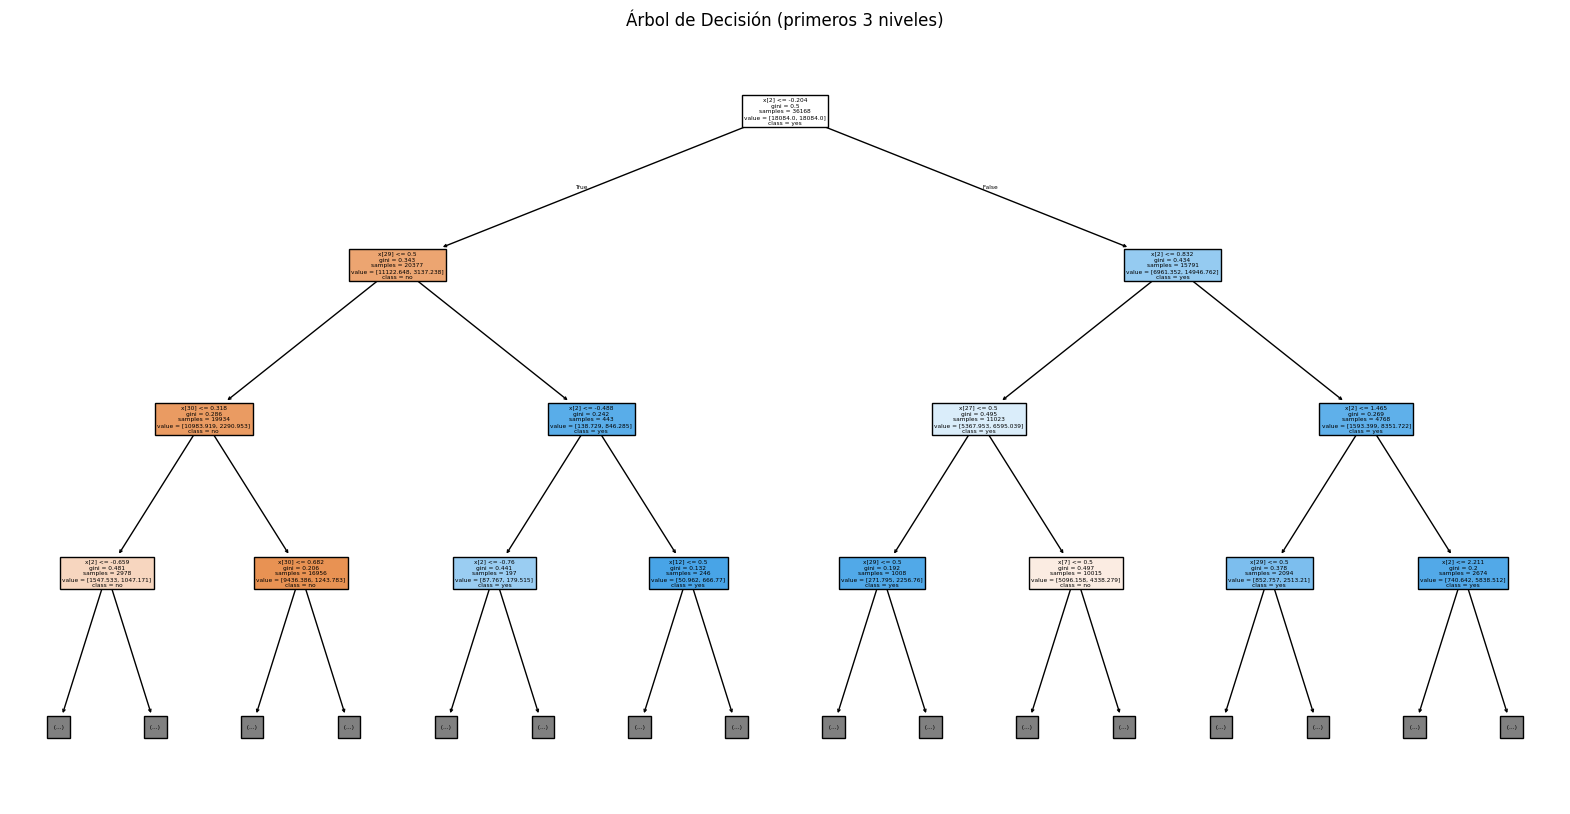

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, max_depth=3,  feature_names=None, class_names=['no', 'yes'])
plt.title("Árbol de Decisión (primeros 3 niveles)")
plt.show()

**cambiar** El modelo no regularizado alcanzó un F1 Score de 0.4505442498816848 en el conjunto de prueba. Sin embargo, al no limitar la profundidad del árbol, este tiende a sobreajustarse a los datos de entrenamiento, capturando patrones muy específicos que no generalizan bien.

El árbol completo tiene una estructura compleja y profunda, lo que indica un alto riesgo de overfitting. Aunque se usó class_weight='balanced' para contrarrestar el desbalance de clases, un modelo sin regularización sigue siendo propenso a memorizar datos en lugar de aprender reglas generalizables.  dado que es un árbol no limitado, la gráfica sería ilegible y muy lenta de procesar si no la cortamos.


---


*Escriba* su respuesta en esta celda...


---


### Pegunta 1.7

En el contexto particular de una campaña de marketing, donde probablemente la mayoría de clientes no harán depósitos, es importante identificar correctamente tanto los clientes que harán depósitos (clase minoritaria), como los clientes que no harán depósitos.

En el primer caso, falsos negativos implican un cliente peridido. En el segundo caso, falsos positivos implicarían un gasto de marketing innecesario en clientes que no son de interés. En este sentido, si clasificamos a todos los clientes como individuos que no harán depósitos, el _accuracy_ será muy alto, pero el costo económico será muy grande.

Para penalizar tanto falsos positivos, como falsos negativos, a la vez que se busca maximizar los verdaderos positivos, nos enfocaremos en la métrica de _performance_ $F_1\ Score$.

Calcule el $F_1\ Score$ de su árbol no regularizado con la muestra correcta. ¿Considera que es un buen valor? Comente.

In [ ]:
#F1 score
f1_dt = f1_score(y_test, y_pred_dt, pos_label='yes')
print("F1 Score del modelo no regularizado:", f1_dt)

F1 Score del modelo no regularizado: 0.4430740037950664


No se considera un buen valor, ya que al no estar regularidazo puede tender a overfitting, lo que se ve reflejado en el F1 score


---


*Escriba* su respuesta en esta celda...


---


### Pregunta 1.8

Entrene un árbol clasificador con profundad máxima del árbol igual a 16. Llamaremos a este, "modelo levemente regularizado". Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Luego, despliege el $F_1\ Score$ del modelo sobre la base de entrenamiento.

Grafique una representación del árbol entrenado. ¿Qué puede decir sobre este modelo no regularizado?

In [ ]:
#regularizado con profundidad máxima de 16
dt_lev_reg = DecisionTreeClassifier(max_depth=16, class_weight='balanced', random_state=123)
dt_lev_reg.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=16, random_state=123)

In [ ]:
y_pred_lev_reg = dt_lev_reg.predict(X_test)
f1_lev_reg = f1_score(y_test, y_pred_lev_reg, pos_label='yes')
print("F1 Score del modelo levemente regularizado:", f1_lev_reg)

F1 Score del modelo levemente regularizado: 0.49860917941585536


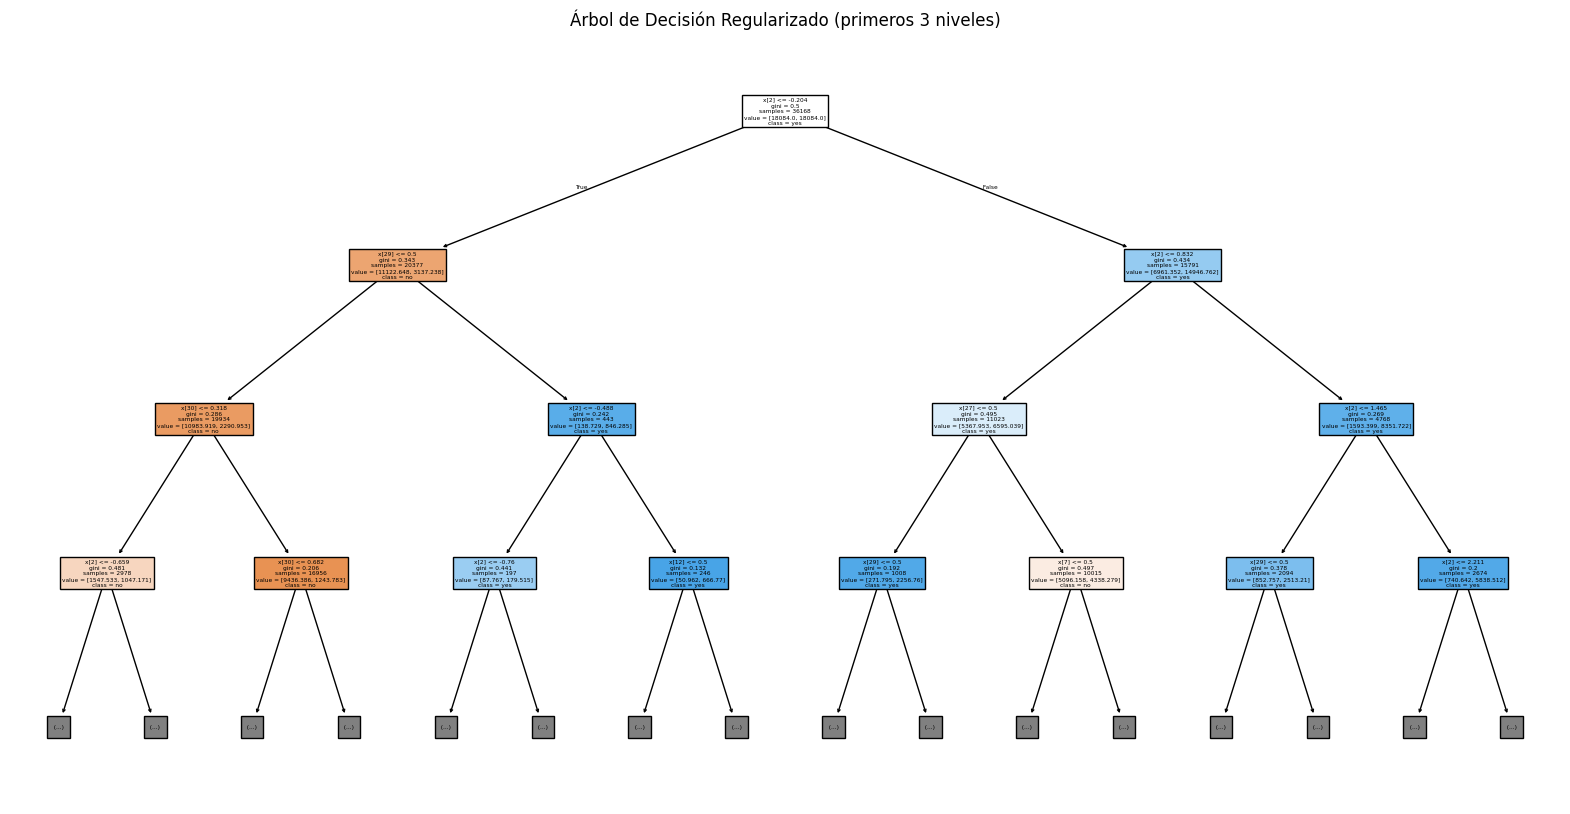

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(dt_lev_reg, filled=True, max_depth=3, feature_names=None, class_names=['no', 'yes'])
plt.title("Árbol de Decisión Regularizado (primeros 3 niveles)")
plt.show()

Podemos ver que el F1 score aumentó al regularizar levemente el árbol, controlando parcialmente la coplejidad del modelo permitiémdole aprender reglas más generales que permiten un mejor equilibrio entre precission y recall, lo que se refleja en un mejor F1 score



---


*Escriba* su respuesta en esta celda...


---


### Pregunta 1.9

Entrene un árbol clasificador con profundad máxima del árbol igual a 8. Llamaremos a este, "modelo regularizado". Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Luego, despliege el $F_1\ Score$ del modelo sobre la base de entrenamiento.

Grafique una representación del árbol entrenado. ¿Qué puede decir sobre este modelo no regularizado?


In [ ]:
dt_reg = DecisionTreeClassifier(max_depth=8, class_weight='balanced', random_state=123)
dt_reg.fit(X_train, y_train)

y_pred_reg = dt_reg.predict(X_test)
f1_reg = f1_score(y_test, y_pred_reg, pos_label='yes')

print("F1 Score del modelo regularizado :", f1_reg)

F1 Score del modelo regularizado : 0.49900765523107454


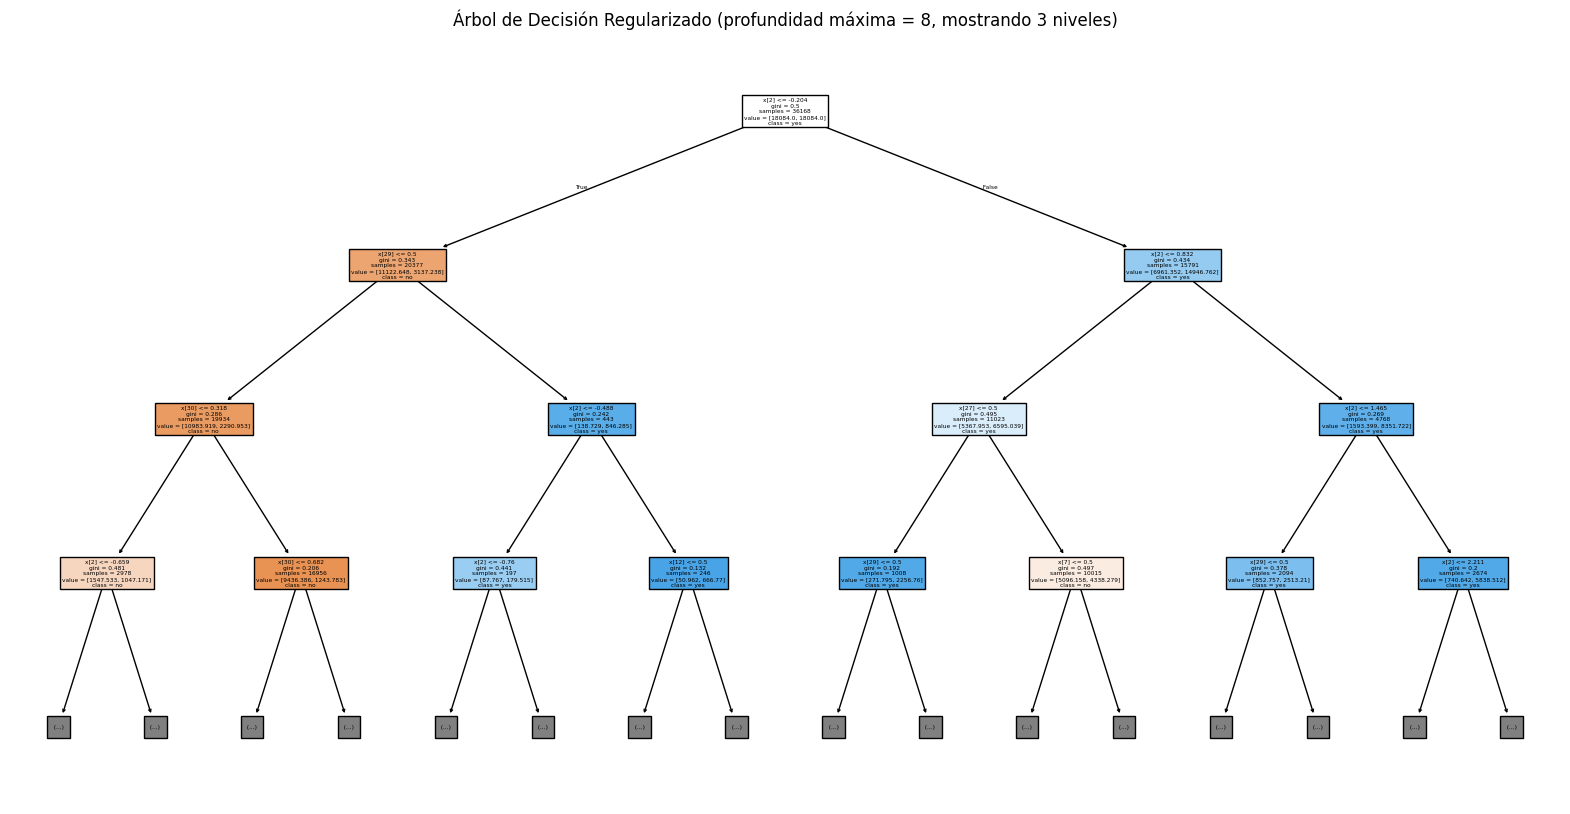

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(dt_reg, filled=True, max_depth=3, feature_names=None, class_names=['no', 'yes'])
plt.title("Árbol de Decisión Regularizado (profundidad máxima = 8, mostrando 3 niveles)")
plt.show()

Podemos ver que limitando aún más el modelo seguimos encontrando mejoras en el indicador, producto de los problemas de overfitting antes señalados.


---


*Escriba* su respuesta en esta celda...


---


### Pregunta 1.10

Entrene 20 árboles de clasificación. Cada uno de ellos debe estar entrenado fijando la profundidad máxima del árbol `max_depth` igual a $n \in [1,20]$. Obtenga el $F_1\ Score$ de cada árbol con la base de entrenamiento y la base de prueba.

Gafique en una misma figura $F_1\ Score$ de entrenamiento contra $n$ y $F_1\ Score$ de prueba contra $n$ (Eje X = $n$). ¿Cuál parece ser el parámetro óptimo $n^*$ para el árbol? ¿Qué puede decir sobre el parámetro sobre _overfitting_ y generalización?

In [ ]:
f1_train_scores = []
f1_test_scores = []
depth_values = list(range(1, 21))

# Entrenar árboles con profundidad de 1 a 20
for n in depth_values:
    model = DecisionTreeClassifier(max_depth=n, class_weight='balanced', random_state=123)
    model.fit(X_train, y_train)

    # Predecir en train y test
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # F1 Score
    f1_train = f1_score(y_train, y_train_pred, pos_label='yes')
    f1_test = f1_score(y_test, y_test_pred, pos_label='yes')

    f1_train_scores.append(f1_train)
    f1_test_scores.append(f1_test)

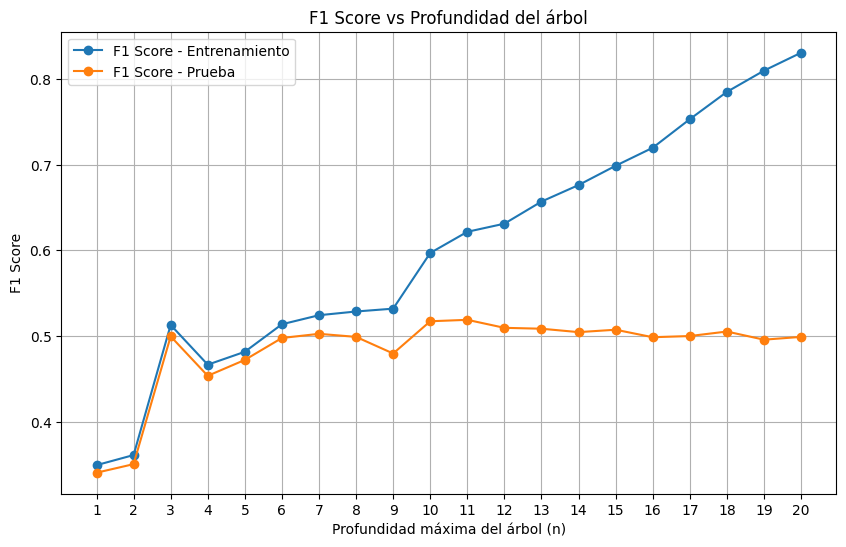

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(depth_values, f1_train_scores, marker='o', label='F1 Score - Entrenamiento')
plt.plot(depth_values, f1_test_scores, marker='o', label='F1 Score - Prueba')
plt.xlabel('Profundidad máxima del árbol (n)')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Profundidad del árbol')
plt.legend()
plt.grid(True)
plt.xticks(depth_values)
plt.show()


**cambiar** Al entrenar árboles con profundidades desde 1 hasta 20, se observó que el F1 Score en el conjunto de entrenamiento aumenta consistentemente, lo cual es esperable, ya que árboles más profundos tienen mayor capacidad para memorizar los datos.

Sin embargo, el F1 Score en la muestra de prueba alcanza su máximo en torno a profundidad 10 u 11, y luego se mantiene estable o disminuye ligeramente. Esto sugiere que a partir de ese punto el modelo comienza a sobreajustar (overfitting), es decir, aprende patrones específicos del entrenamiento que no generalizan bien a nuevos datos.

El valor óptimo de profundidad del árbol parece estar en torno a 10, ya que representa el mejor compromiso entre ajuste al entrenamiento y capacidad de generalización al test.

Este comportamiento refleja claramente la relación entre la complejidad del modelo y su desempeño: un modelo muy simple subajusta (underfitting), uno muy complejo sobreajusta (overfitting), y existe un punto intermedio donde se logra el mejor rendimiento general.


---


*Escriba* su respuesta en esta celda...


---


### Pregunta 1.11

En esta pregunta deberá entrenar _Random orest Classifier_ realizando un ejercicio previo de _hyperparameter tuning_.

Realice _Cross Validation_ con un _folding_ con `K=5` y calcule $F_1\ Score$ de todas las posibles combinaciones de los siguientes parámetros:

- `n_estimators = {100, 1000}`
- `max_depth = {10, 50, 100}`
- `min_samples_leaf = {2, 4}`

Determine la mejor combinación de parámetros y vuelva a entrenar su bosque con esta. Finalmente, reporte el $F_1\ Score$ con la muestra de prueba.

Cuando realice _Cross Validation_ y cuando entrene el modelo final, asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `RandomForestClassifier()` (parámetros de inicialización): https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

In [ ]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=123)

param_grid = {'n_estimators': [100, 1000], 'max_depth': [10, 50, 100],'min_samples_leaf': [2, 4]}

f1_scorer = make_scorer(f1_score, pos_label='yes')

# Cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

#buscar con F1
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,scoring=f1_scorer,cv=cv,n_jobs=-1,verbose=1)

# Ejecutar búsqueda
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


KeyboardInterrupt: 

In [ ]:
print("Mejores hiperparámetros")
print(grid_search.best_params_)

# Modelo final con mejores hiperparámetros
best_rf = grid_search.best_estimator_

In [ ]:
y_pred_rf = best_rf.predict(X_test)
f1_rf = f1_score(y_test, y_pred_rf, pos_label='yes')
print("F1 Random Forest mejores hiperparámetros:", f1_rf)

### Pregunta 1.12

En esta pregunta deberá entrenar _XGBpost Classifier_ realizando un ejercicio previo de _hyperparameter tuning_.

Repita el ejercicio de _Cross Validation_ anterior, pero está vez evaluando:

- `n_estimators = {100, 1000}`
- `max_depth = {5, 50, 100}`
- `learning_rate = {0.05, 0.1, 0.5}`
- `max_leaves= {2, 4, 10}`

Determine la mejor combinación de parámetros y vuelva a entrenar su bosque con esta, reportando el $F_1\ Score$ con la muestra de prueba.

Asegúrese de que sus modelos sean capaces de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `XGBClassifier()` (parámetros de inicialización): https://xgboost.readthedocs.io/en/latest/python/python_api.html.


In [ ]:
from xgboost import XGBClassifier


In [ ]:
y_train_bin = y_train.replace({'no': 0, 'yes': 1})
y_test_bin = y_test.replace({'no': 0, 'yes': 1})


xgb = XGBClassifier(
    random_state=123,
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=(y_train_bin.value_counts()[0] / y_train_bin.value_counts()[1])
)


param_grid = {
    "n_estimators": [100, 1000],
    "max_depth": [5, 50, 100],
    "learning_rate": [0.05, 0.1, 0.5],
    "max_leaves": [2, 4, 10]
}

# GridSearch con F1
f1_scorer = make_scorer(f1_score, pos_label=1)

grid_search = GridSearchCV(
    xgb,
    param_grid,
    cv=5,
    scoring=f1_scorer,
    n_jobs=-1,
    return_train_score=True
)

# Entrenamiento
grid_search.fit(X_train, y_train_bin)


grid_search.best_params_

In [ ]:
xgb_best = XGBClassifier(
    random_state=123,
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=(y_train_bin.value_counts()[0] / y_train_bin.value_counts()[1]),
    **grid_search.best_params_
)

xgb_best.fit(X_train, y_train_bin)


In [ ]:
y_pred = xgb_best.predict(X_test)
f1 = f1_score(y_test_bin, y_pred, pos_label=1)
print("F1 Score en test del mejor modelo XGBoost:", f1)

### Pregunta 1.13

Entrene un modelo _Naïve Bayes_. Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `GaussianNB()` (parámetros de inicialización): https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html.


Despliege el $F_1\ Score$ del modelo sobre la base de entrenamiento.

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

gnb = GaussianNB()
gnb.fit(X_train, y_train_bin)


y_pred_train = gnb.predict(X_train)


cm_train = confusion_matrix(y_train_bin, y_pred_train)
acc_train = accuracy_score(y_train_bin, y_pred_train)
f1_train = f1_score(y_train_bin, y_pred_train, pos_label=1)

print("Matriz de confusión (train):")
print(cm_train)

print("Accuracy (train):", acc_train)
print("F1 Score (train):", f1_train)



---



## Análisis Comparativo de Modelos de Clasificación


### Pregunta 1.14

Evalúe y compare el desempeño de los modelos teniendo en cuenta la naturaleza del conjunto de datos. ¿Cómo afectó el desbalance a cada modelo? ¿Qué modelo manejó mejor el balance o desbalance de clases y cuáles son sus conclusiones generales sobre su rendimiento comparado?

Para que la comparación sea clara, es útil indicar qué métricas de evaluación utilizo para comparar los modelos (por ejemplo, F1-score, precisión, recall, AUC, etc.).

In [ ]:
y_proba_xgb = xgb_best.predict_proba(X_test)[:, 1]
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]
y_proba_dt_lev_reg = dt_lev_reg.predict_proba(X_test)[:, 1]
y_proba_dt_reg = dt_reg.predict_proba(X_test)[:, 1]
y_proba_nb = gnb.predict_proba(X_test)[:, 1]


In [ ]:
from sklearn.metrics import roc_curve, auc

y_test_bin = y_test.replace({'no': 0, 'yes': 1})

fpr_xgb, tpr_xgb, _ = roc_curve(y_test_bin, y_proba_xgb)
auc_xgb = auc(fpr_xgb, tpr_xgb)

fpr_rf, tpr_rf, _ = roc_curve(y_test_bin, y_proba_rf)
auc_rf = auc(fpr_rf, tpr_rf)

fpr_dt, tpr_dt, _ = roc_curve(y_test_bin, y_proba_dt)
auc_dt = auc(fpr_dt, tpr_dt)

fpr_dt_lev_reg, tpr_dt_lev_reg, _ = roc_curve(y_test_bin, y_proba_dt_lev_reg)
auc_dt_lev_reg = auc(fpr_dt_lev_reg, tpr_dt_lev_reg)

fpr_dt_reg, tpr_dt_reg, _ = roc_curve(y_test_bin, y_proba_dt_reg)
auc_dt_reg = auc(fpr_dt_reg, tpr_dt_reg)

fpr_nb, tpr_nb, _ = roc_curve(y_test_bin, y_proba_nb)
auc_nb = auc(fpr_nb, tpr_nb)


In [ ]:
plt.figure(figsize=(10, 7))

plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Árbol No Reg. (AUC = {auc_dt:.2f})')
plt.plot(fpr_dt_lev_reg, tpr_dt_lev_reg, label=f'Árbol Lev. Reg. (AUC = {auc_dt_lev_reg:.2f})')
plt.plot(fpr_dt_reg, tpr_dt_reg, label=f'Árbol Reg. (AUC = {auc_dt_reg:.2f})')
plt.plot(fpr_nb, tpr_nb, label=f'Naïve Bayes (AUC = {auc_nb:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # línea base aleatoria
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC y AUC para todos los modelos')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

F1 Score del modelo no regularizado: 0.4505442498816848

F1 Score del modelo levemente regularizado: 0.497737556561086

F1 Score del modelo regularizado : 0.4975831674722775

F1 Random Forest mejores hiperparámetros: 0.5750943396226416

F1 Score en test del mejor modelo XGBoost: 0.5557717250324254

F1 Score Naive Bayes: 0.4063523573200993


---
Para comparar los desempeños de los modelos se utilizó principalmente el indicador F1 score, ya que este es un promedio entre las medidas de Recall y Precision, es decir toma en cuenta tanto los clientes mal clasificados como verdaderos interesados y aquellos realmente interesados pero no detectados. Adicionalmente se realizó un analisis mediante un area bajo la curva roc, que nos permite ver la evaluacion entre los verdaderos positivos y los falsos positivos a medida que se varia el umbral probabilístico. es en este contexto que RF es aquel modelo con un mayor F1 score y AUC, por lo que tuvo el mayor desempeño globla, mostrando una buena respuesta ante las clases desbalanceadas gracias a la opción de class_weight = balanced que utiliza los valores de y para ajustar los pesos inversamente proporcionales a las frecuencias de las clases en la data de input. XGboost también mostró buenos indicadores cercanos a RF, permitiendole una robustez ante el desbalance gracias a scale_post_weight. Podemos notar también que el desbalance de clases afectó mayoritariamente a modelos más sencilos como NB o los árboles individuales, ya que tienden a favorecer a la clase mayoritaria, y podemos observar sus bajos F1 score posiblemente por overfiting para. Los árboles individuales, ya que algunos no tenían restricción, y por underfitting para NB ya que es un modelo demasiado sencillo.


*Escriba* su respuesta en esta celda...


---


# KMeans & PCA

La guerra comercial desatada levanta un montón de preguntas de interés en economía. Una de estas es: ¿Qué países sufrirán de forma similar las consecuencias de esta? ¿Quiénes serían ganadores? ¿Quienes serían perdedores?

En esta parte exploraremos el aporte que los métodos de Clustering de Machine Learning pueden hacer a la respuesta de esta cuestión. Nos enfocaremos en variables relacionadas al comercio exterior para determinar similitud entre grupos de países. Más específicamente, en variables relacionadas a las exportaciones.

Para esto, considere las siguientes variables que describen el perfil exportador de cada país:

- GDP growth (annual %)
- Agricultural raw materials exports (% of merchandise exports)
- Computer, communications and other services (% of commercial service exports)
- Exports of goods and services (% of GDP)
- Food exports (% of merchandise exports)
- Fuel exports (% of merchandise exports)
- High-technology exports (% of manufactured exports)
- ICT service exports (% of service exports, BoP)
- Insurance and financial services (% of service exports, BoP)
- International tourism, receipts (% of total exports)
- Manufactures exports (% of merchandise exports)
- Merchandise exports to high-income economies (% of total merchandise exports)
- Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)
- Ores and metals exports (% of merchandise exports)
- Taxes on exports (% of tax revenue)
- Transport services (% of commercial service exports)


La idea será determinar similitud entre países y las variables qué son más relevantes a la hora de determinarla.

Debido a que 2023 es el año reciente con una mayor riqueza de datos, y debido a que nos interesan cambios respecto al _status quo_ en el contexto actual, trabajaremos con datos sólo de aquel año.

Database Source: World bank & Trade Analysis Information System.



### Pregunta 2.0

Cargue la base de datos disponible en el siguiente link: https://raw.githubusercontent.com/olherreragz/EAE3709-2025-1/refs/heads/main/T2_data/Data.cs.

En el siguiente link podrá encontrar información adicional sobre el _dataset_ por si lo llega a necesitar: https://github.com/olherreragz/EAE3709-2025-1/blob/main/T2_data/Series_Metadata.csv.

Elimine las columnas `"Series Code"` y `"Country Code"`. Luego, transforme su _dataframe_ de formato _Long_ a _Wide_. Su _dataframe_ final deberá contener una columna que indique el nombre del país y columnas que indiquen la medida de exportación correspondiente:

`<Country>, <SeriesName1>, <SeriesName2> ....`



![Long to Wide Format](https://tavareshugo.github.io/r-intro-tidyverse-gapminder/fig/07-data_shapes.png)




In [ ]:
#borrar item pasado
%reset -f

#Librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
url = "https://raw.githubusercontent.com/olherreragz/EAE3709-2025-1/refs/heads/main/T2_data/Data.csv"
df = pd.read_csv(url)

In [ ]:
df = df.drop(columns=["Series Code", "Country Code"])

df = df.pivot(index='Country Name', columns='Series Name', values='2023 [YR2023]').reset_index()

df.head()

Series Name,Country Name,Agricultural raw materials exports (% of merchandise exports),Computer; communications and other services (% of commercial service exports),Exports of goods and services (% of GDP),Food exports (% of merchandise exports),Fuel exports (% of merchandise exports),GDP growth (annual %),High-technology exports (% of manufactured exports),ICT service exports (% of service exports; BoP),Insurance and financial services (% of service exports; BoP),International tourism; receipts (% of total exports),Manufactures exports (% of merchandise exports),Merchandise exports to high-income economies (% of total merchandise exports),Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports),Ores and metals exports (% of merchandise exports),Taxes on exports (% of tax revenue),Transport services (% of commercial service exports)
0,Afghanistan,..,..,16.7751362822863,..,..,2.71088679128353,..,..,..,..,..,12.8798269363707,9.68241869729934,..,..,..
1,Africa Eastern and Southern,1.93287526195653,35.9298385263195,24.3483372544611,14.285851632509,25.4254224001233,2.32013780158925,5.80516538196113,6.10657347896149,6.08028700896879,..,29.1304853698777,44.3959450802976,0.471789673271105,23.4925994471713,..,22.9754549072797
2,Africa Western and Central,3.80482687815641,23.7057568350145,..,12.9874441377748,61.3705691120184,3.3547328190002,..,5.69176863421842,14.9934752391386,..,6.76897203140647,54.1428772898838,3.17153807284374,4.3390849886261,..,36.2200117483328
3,Albania,0.406032063201426,24.4301090197124,38.6650817896799,11.9640780632637,6.34538423879421,3.93662525742167,0.682326849473647,3.01397608748124,0.662505307988438,..,56.6139655531231,77.7081307571647,19.5159727248964,5.34944752843742,..,10.9287529629646
4,Algeria,..,59.1626427564765,23.6195363708424,..,..,4.10000000000004,..,2.21311390791552,10.2830758414755,..,..,80.1800299622258,6.36723723188521,..,..,25.4709095419937


### Pregunta 2.1

Debido a que la pregunta de interés es sobre identificación de grupos de países, elime filas donde `Country Name` sea igual a cualquiera de los siguientes valores:

- "Africa Eastern and Southern"  
- "Africa Western and Central"  
- "Arab World"  
- "Caribbean small states"  
- "Central Europe and the Baltics"  
- "Early-demographic dividend"  
- "East Asia & Pacific"  
- "East Asia & Pacific (IDA & IBRD countries)"  
- "East Asia & Pacific (excluding high income)"  
- "Euro area"  
- "Europe & Central Asia"  
- "Europe & Central Asia (IDA & IBRD countries)"  
- "Europe & Central Asia (excluding high income)"  
- "European Union"  
- "Fragile and conflict affected situations"  
- "Heavily indebted poor countries (HIPC)"  
- "High income"  
- "IBRD only"  
- "IDA & IBRD total"  
- "IDA blend"  
- "IDA only"  
- "IDA total"  
- "Late-demographic dividend"  
- "Latin America & Caribbean"  
- "Latin America & Caribbean (excluding high income)"  
- "Latin America & the Caribbean (IDA & IBRD countries)"  
- "Least developed countries: UN classification"  
- "Low & middle income"  
- "Low income"  
- "Lower middle income"  
- "Middle East & North Africa"  
- "Middle East & North Africa (IDA & IBRD countries)"  
- "Middle East & North Africa (excluding high income)"  
- "Middle income"  
- "North America"  
- "Not classified"  
- "OECD members"  
- "Other small states"  
- "Pacific island small states"  
- "Post-demographic dividend"  
- "Pre-demographic dividend"  
- "Small states"  
- "South Asia"  
- "South Asia (IDA & IBRD)"  
- "Sub-Saharan Africa"  
- "Sub-Saharan Africa (IDA & IBRD countries)"  
- "Sub-Saharan Africa (excluding high income)"  
- "Upper middle income"  
- "World"




In [ ]:
eliminar = ["Africa Eastern and Southern",
"Africa Western and Central",
"Arab World",
"Caribbean small states",
"Central Europe and the Baltics",
"Early-demographic dividend",
"East Asia & Pacific",
"East Asia & Pacific (IDA & IBRD countries)",
"East Asia & Pacific (excluding high income)",
"Euro area",
"Europe & Central Asia",
"Europe & Central Asia (IDA & IBRD countries)",
"Europe & Central Asia (excluding high income)",
"European Union",
"Fragile and conflict affected situations",
"Heavily indebted poor countries (HIPC)",
"High income",
"IBRD only",
"IDA & IBRD total",
"IDA blend",
"IDA only",
"IDA total",
"Late-demographic dividend",
"Latin America & Caribbean",
"Latin America & Caribbean (excluding high income)",
"Latin America & the Caribbean (IDA & IBRD countries)",
"Least developed countries: UN classification",
"Low & middle income",
"Low income",
"Lower middle income",
"Middle East & North Africa",
"Middle East & North Africa (IDA & IBRD countries)",
"Middle East & North Africa (excluding high income)",
"Middle income",
"North America",
"Not classified",
"OECD members",
"Other small states",
"Pacific island small states",
"Post-demographic dividend",
"Pre-demographic dividend",
"Small states",
"South Asia",
"South Asia (IDA & IBRD)",
"Sub-Saharan Africa",
"Sub-Saharan Africa (IDA & IBRD countries)",
"Sub-Saharan Africa (excluding high income)",
"Upper middle income",
"World"]

In [ ]:
df = df[df['Country Name'].apply(lambda x: x not in eliminar)]

#verificar
#df['Country Name'].value_counts().get('South Asia', 0)

### Pregunta 2.2

Reemplace todos los valores `".."` por `NA`. Luego, transforme las columnas a variables numéricas y despliegue estadísticas descriptivas.


---

**Supuesto**: "NA" se refiere a un valor faltante "NaN"

---

In [ ]:
#replace
df.replace("..", np.nan, inplace=True)
(df == "..").sum().sum()

#df.dtypes

<ipython-input-36-34a80bc1b895>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("..", np.nan, inplace=True)


np.int64(0)

In [ ]:
#a numeric
df["Agricultural raw materials exports (% of merchandise exports)"] = pd.to_numeric(df["Agricultural raw materials exports (% of merchandise exports)"])
df["Computer; communications and other services (% of commercial service exports)"] = pd.to_numeric(df["Computer; communications and other services (% of commercial service exports)"])
df["Exports of goods and services (% of GDP)"] = pd.to_numeric(df["Exports of goods and services (% of GDP)"])
df["Food exports (% of merchandise exports)"] = pd.to_numeric(df["Food exports (% of merchandise exports)"])
df["Fuel exports (% of merchandise exports)"] = pd.to_numeric(df["Fuel exports (% of merchandise exports)"])
df["GDP growth (annual %)"] = pd.to_numeric(df["GDP growth (annual %)"])
df["High-technology exports (% of manufactured exports)"] = pd.to_numeric(df["High-technology exports (% of manufactured exports)"])
df["ICT service exports (% of service exports; BoP)"] = pd.to_numeric(df["ICT service exports (% of service exports; BoP)"])
df["Insurance and financial services (% of service exports; BoP)"] = pd.to_numeric(df["Insurance and financial services (% of service exports; BoP)"])
df["International tourism; receipts (% of total exports)"] = pd.to_numeric(df["International tourism; receipts (% of total exports)"])
df["Manufactures exports (% of merchandise exports)"] = pd.to_numeric(df["Manufactures exports (% of merchandise exports)"])
df["Merchandise exports to high-income economies (% of total merchandise exports)"] = pd.to_numeric(df["Merchandise exports to high-income economies (% of total merchandise exports)"])
df["Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)"] = pd.to_numeric(df["Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)"])
df["Ores and metals exports (% of merchandise exports)"] = pd.to_numeric(df["Ores and metals exports (% of merchandise exports)"])
df["Taxes on exports (% of tax revenue)"] = pd.to_numeric(df["Taxes on exports (% of tax revenue)"])
df["Transport services (% of commercial service exports)"] = pd.to_numeric(df["Transport services (% of commercial service exports)"])

#df.dtypes

In [ ]:
#estadísticas descriptivas

df.describe()

Series Name,Agricultural raw materials exports (% of merchandise exports),Computer; communications and other services (% of commercial service exports),Exports of goods and services (% of GDP),Food exports (% of merchandise exports),Fuel exports (% of merchandise exports),GDP growth (annual %),High-technology exports (% of manufactured exports),ICT service exports (% of service exports; BoP),Insurance and financial services (% of service exports; BoP),International tourism; receipts (% of total exports),Manufactures exports (% of merchandise exports),Merchandise exports to high-income economies (% of total merchandise exports),Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports),Ores and metals exports (% of merchandise exports),Taxes on exports (% of tax revenue),Transport services (% of commercial service exports)
count,149.000000,161.000000,158.000000,149.000000,145.000000,195.000000,147.000000,157.000000,152.000000,0.0,149.000000,205.000000,192.000000,149.000000,22.000000,161.000000
mean,2.726255,35.005284,45.398868,24.136526,14.275881,3.241160,11.352849,10.234009,5.732781,NaN,42.098438,60.914241,5.096570,9.476862,2.624425,20.583359
std,7.416283,23.550764,33.331007,23.862474,23.215387,6.641153,13.507894,11.534976,7.703914,NaN,29.236666,24.978469,11.628976,15.470820,4.899022,16.870115
min,0.000000,0.935706,1.108109,0.079874,0.000000,-20.111576,0.000000,0.043145,0.008135,NaN,0.210353,0.121224,0.000034,0.000000,0.000002,0.663447
25%,0.343928,13.309551,23.637110,8.338115,0.498740,1.168088,2.226174,2.681207,1.319000,NaN,15.347126,43.902677,0.244645,1.353868,0.046153,7.784412
50%,0.794963,32.273353,38.790357,15.056512,4.097826,2.960181,6.030929,7.285006,3.203366,NaN,37.251121,65.682415,0.942470,3.138350,0.232860,15.739129
75%,2.120083,53.862266,56.494967,32.790842,15.770449,4.987486,16.841983,12.745838,7.163361,NaN,68.665103,82.370504,3.269713,8.391231,1.419763,27.632283
max,63.703068,95.860793,212.530618,98.210416,95.516439,75.061377,72.315489,61.766896,55.672826,NaN,94.990393,97.770966,96.949670,76.471800,15.578989,86.950670


### Pregunta 2.3

Grafique la distribución empírica de todas las variables numéricas del dataset. Comente sobre cada una de ellas.

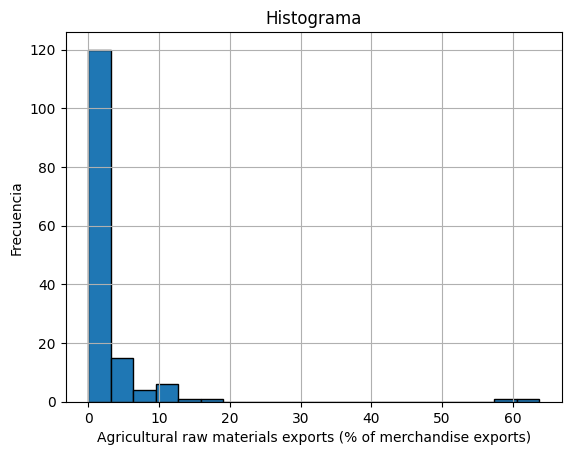

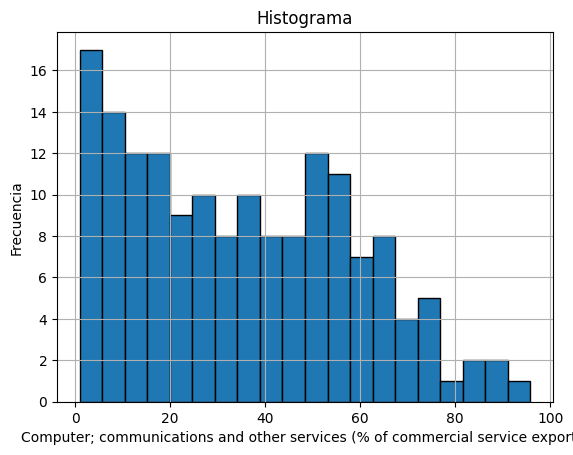

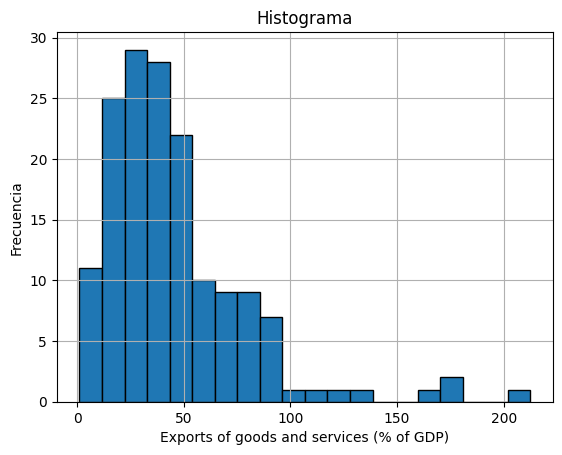

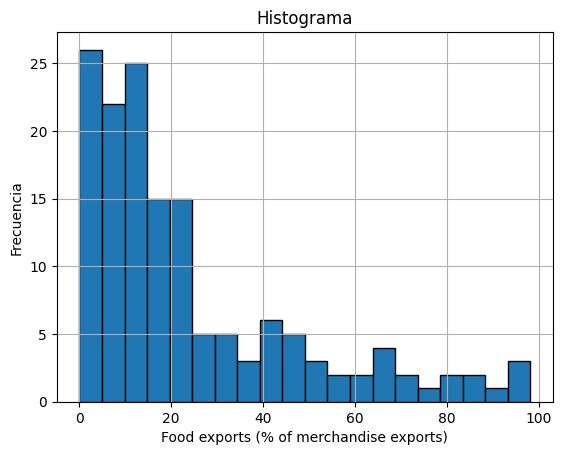

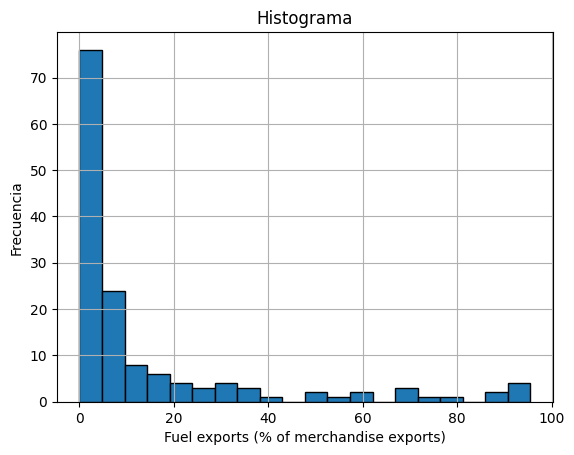

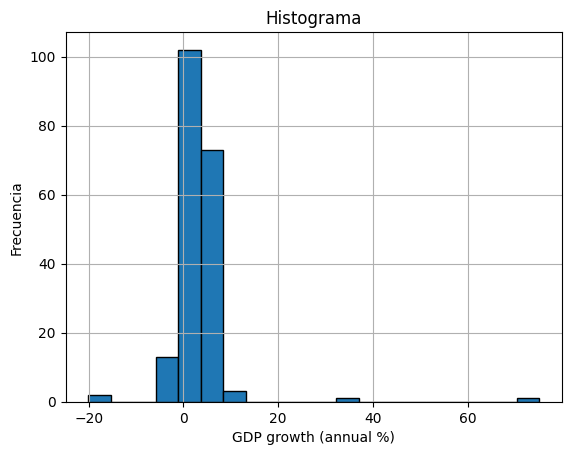

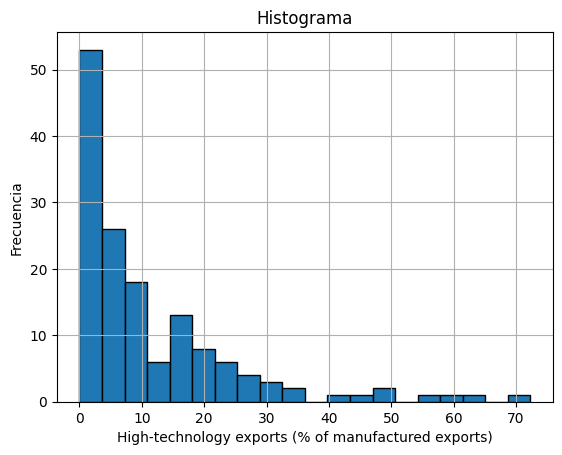

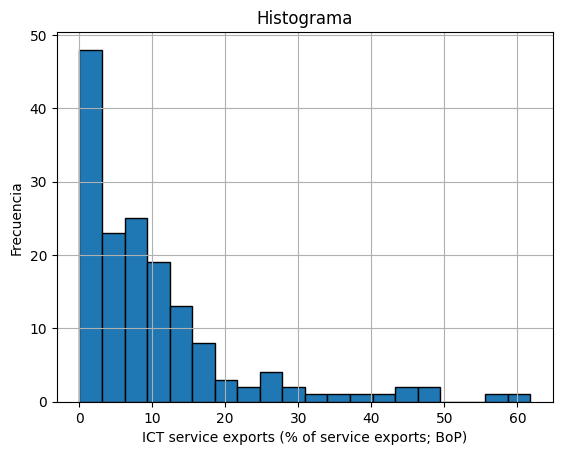

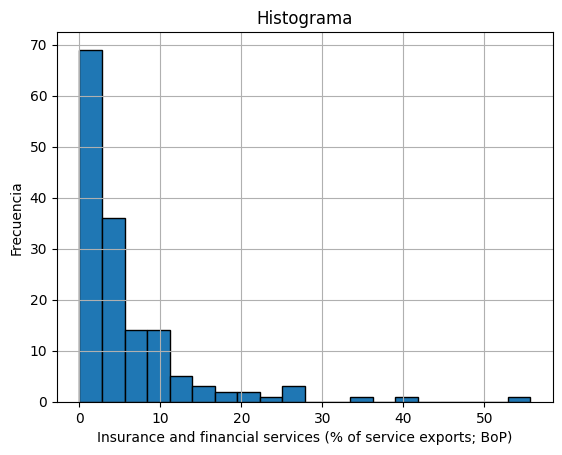

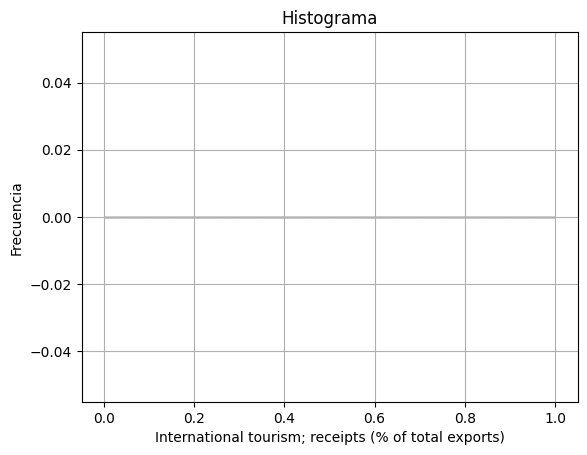

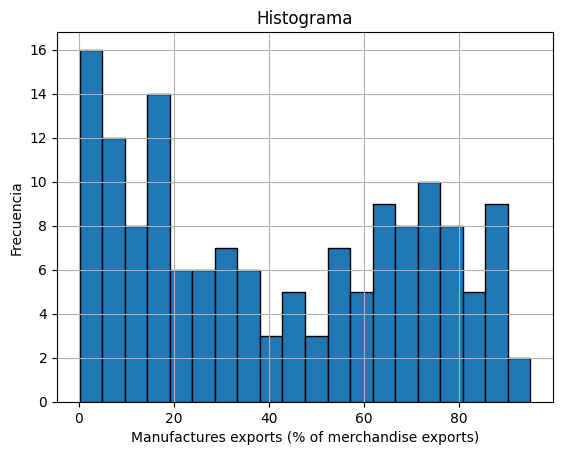

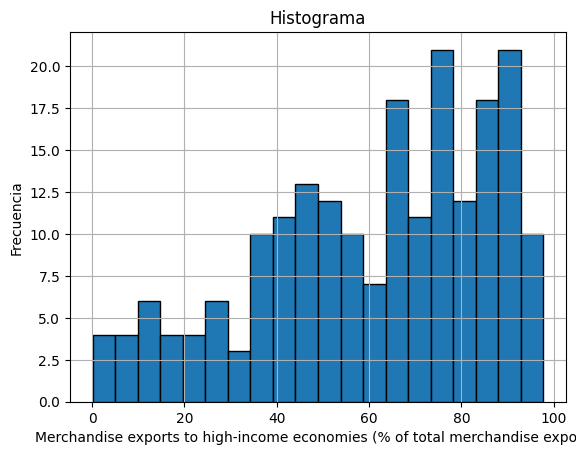

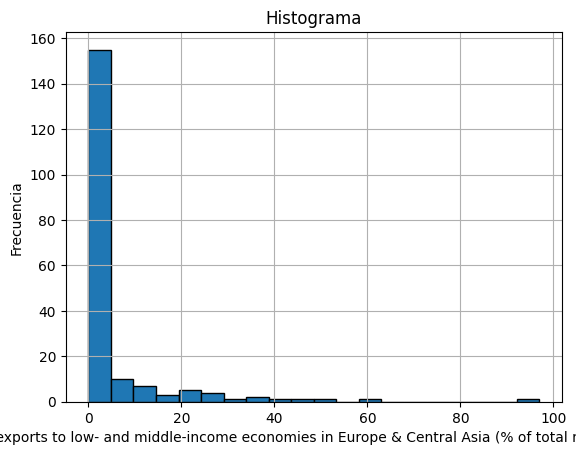

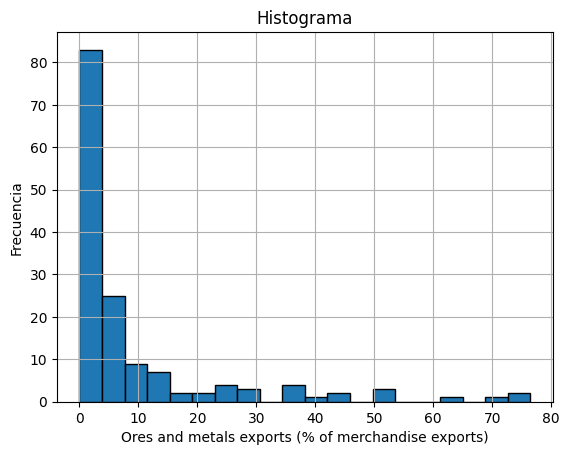

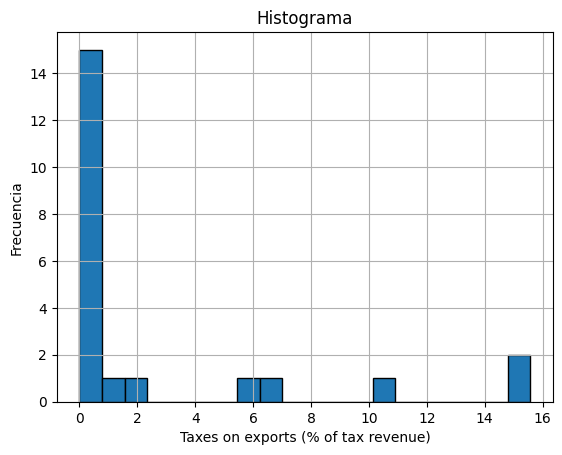

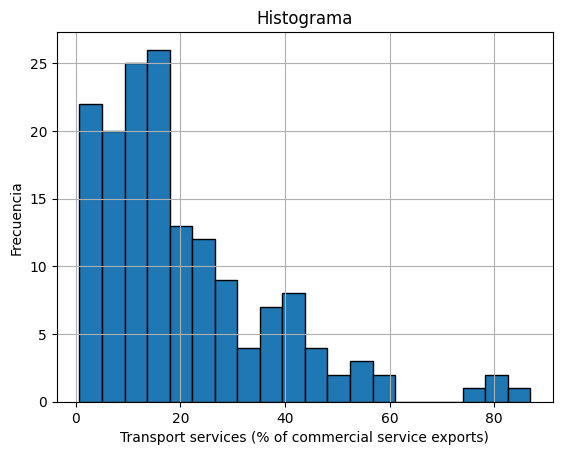

In [ ]:
df['Agricultural raw materials exports (% of merchandise exports)'].hist(bins=20, edgecolor='black')
plt.title('Histograma')
plt.xlabel('Agricultural raw materials exports (% of merchandise exports)')
plt.ylabel('Frecuencia')
plt.show()

df['Computer; communications and other services (% of commercial service exports)'].hist(bins=20, edgecolor='black')
plt.title('Histograma')
plt.xlabel('Computer; communications and other services (% of commercial service exports)')
plt.ylabel('Frecuencia')
plt.show()

df['Exports of goods and services (% of GDP)'].hist(bins=20, edgecolor='black')
plt.title('Histograma')
plt.xlabel('Exports of goods and services (% of GDP)')
plt.ylabel('Frecuencia')
plt.show()

df['Food exports (% of merchandise exports)'].hist(bins=20, edgecolor='black')
plt.title('Histograma')
plt.xlabel('Food exports (% of merchandise exports)')
plt.ylabel('Frecuencia')
plt.show()

df['Fuel exports (% of merchandise exports)'].hist(bins=20, edgecolor='black')
plt.title('Histograma')
plt.xlabel('Fuel exports (% of merchandise exports)')
plt.ylabel('Frecuencia')
plt.show()

df['GDP growth (annual %)'].hist(bins=20, edgecolor='black')
plt.title('Histograma')
plt.xlabel('GDP growth (annual %)')
plt.ylabel('Frecuencia')
plt.show()

df['High-technology exports (% of manufactured exports)'].hist(bins=20, edgecolor='black')
plt.title('Histograma')
plt.xlabel('High-technology exports (% of manufactured exports)')
plt.ylabel('Frecuencia')
plt.show()

df['ICT service exports (% of service exports; BoP)'].hist(bins=20, edgecolor='black')
plt.title('Histograma')
plt.xlabel('ICT service exports (% of service exports; BoP)')
plt.ylabel('Frecuencia')
plt.show()

df['Insurance and financial services (% of service exports; BoP)'].hist(bins=20, edgecolor='black')
plt.title('Histograma')
plt.xlabel('Insurance and financial services (% of service exports; BoP)')
plt.ylabel('Frecuencia')
plt.show()

df['International tourism; receipts (% of total exports)'].hist(bins=20, edgecolor='black')
plt.title('Histograma')
plt.xlabel('International tourism; receipts (% of total exports)')
plt.ylabel('Frecuencia')
plt.show()

df['Manufactures exports (% of merchandise exports)'].hist(bins=20, edgecolor='black')
plt.title('Histograma')
plt.xlabel('Manufactures exports (% of merchandise exports)')
plt.ylabel('Frecuencia')
plt.show()

df['Merchandise exports to high-income economies (% of total merchandise exports)'].hist(bins=20, edgecolor='black')
plt.title('Histograma')
plt.xlabel('Merchandise exports to high-income economies (% of total merchandise exports)')
plt.ylabel('Frecuencia')
plt.show()

df['Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)'].hist(bins=20, edgecolor='black')
plt.title('Histograma')
plt.xlabel('Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)')
plt.ylabel('Frecuencia')
plt.show()

df['Ores and metals exports (% of merchandise exports)'].hist(bins=20, edgecolor='black')
plt.title('Histograma')
plt.xlabel('Ores and metals exports (% of merchandise exports)')
plt.ylabel('Frecuencia')
plt.show()

df['Taxes on exports (% of tax revenue)'].hist(bins=20, edgecolor='black')
plt.title('Histograma')
plt.xlabel('Taxes on exports (% of tax revenue)')
plt.ylabel('Frecuencia')
plt.show()

df['Transport services (% of commercial service exports)'].hist(bins=20, edgecolor='black')
plt.title('Histograma')
plt.xlabel('Transport services (% of commercial service exports)')
plt.ylabel('Frecuencia')
plt.show()

## Missing Values

### Pregunta 2.4

Realice análisis de valores vacíos y tratamiento de estos. Se premiará mantener el mayor número de observaciones posibles bajo criterios razonables. Luego de esta pregunta no deben quedar nulos en el _dataframe_ a utilizar.


In [ ]:
df.isnull().sum().sort_values(ascending=False)

total_missings = df.isnull().sum().sort_values(ascending=False)

total_datos = df.isnull().count()

percent_missings = (total_missings/total_datos).sort_values(ascending=False)*100

missing_data = pd.concat([total_missings, percent_missings], axis=1, keys=['Total missings', '% en Data'])
missing_data

,Total missings,% en Data
Series Name,,
International tourism; receipts (% of total exports),217,100.000000
Taxes on exports (% of tax revenue),195,89.861751
Fuel exports (% of merchandise exports),72,33.179724
High-technology exports (% of manufactured exports),70,32.258065
Manufactures exports (% of merchandise exports),68,31.336406
Agricultural raw materials exports (% of merchandise exports),68,31.336406
Ores and metals exports (% of merchandise exports),68,31.336406
Food exports (% of merchandise exports),68,31.336406
Insurance and financial services (% of service exports; BoP),65,29.953917


---


Hay dos variables con sobre 89% de data faltante en sus columnas, no es posible imputar y tener una reppresentación fidedigna de la variable. Se eliminarán

El resto de variables, al ser numéricas serán  imputadas con la mediana para que posibles valores extremos de cada variable no sesguen tanto los valores imputados.


---

In [ ]:
#eliminar
df = df.drop(["International tourism; receipts (% of total exports)", "Taxes on exports (% of tax revenue)"], axis=1)

#imputar
mediana1 = df["Fuel exports (% of merchandise exports)"].median()
df["Fuel exports (% of merchandise exports)"] = df["Fuel exports (% of merchandise exports)"].fillna(mediana1)

mediana2 = df["High-technology exports (% of manufactured exports)"].median()
df["High-technology exports (% of manufactured exports)"] = df["High-technology exports (% of manufactured exports)"].fillna(mediana2)

mediana3 = df["Manufactures exports (% of merchandise exports)"].median()
df["Manufactures exports (% of merchandise exports)"] = df["Manufactures exports (% of merchandise exports)"].fillna(mediana3)

mediana4 = df["Agricultural raw materials exports (% of merchandise exports)"].median()
df["Agricultural raw materials exports (% of merchandise exports)"] = df["Agricultural raw materials exports (% of merchandise exports)"].fillna(mediana4)

mediana5 = df["Ores and metals exports (% of merchandise exports)"].median()
df["Ores and metals exports (% of merchandise exports)"] = df["Ores and metals exports (% of merchandise exports)"].fillna(mediana5)

mediana6 = df["Food exports (% of merchandise exports)"].median()
df["Food exports (% of merchandise exports)"] = df["Food exports (% of merchandise exports)"].fillna(mediana6)

mediana7 = df["Insurance and financial services (% of service exports; BoP)"].median()
df["Insurance and financial services (% of service exports; BoP)"] = df["Insurance and financial services (% of service exports; BoP)"].fillna(mediana7)

mediana8 = df["ICT service exports (% of service exports; BoP)"].median()
df["ICT service exports (% of service exports; BoP)"] = df["ICT service exports (% of service exports; BoP)"].fillna(mediana8)

mediana9 = df["Exports of goods and services (% of GDP)"].median()
df["Exports of goods and services (% of GDP)"] = df["Exports of goods and services (% of GDP)"].fillna(mediana9)

mediana10 = df["Transport services (% of commercial service exports)"].median()
df["Transport services (% of commercial service exports)"] = df["Transport services (% of commercial service exports)"].fillna(mediana10)

mediana11 = df["Computer; communications and other services (% of commercial service exports)"].median()
df["Computer; communications and other services (% of commercial service exports)"] = df["Computer; communications and other services (% of commercial service exports)"].fillna(mediana11)

mediana12 = df["Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)"].median()
df["Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)"] = df["Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)"].fillna(mediana12)

mediana13 = df["GDP growth (annual %)"].median()
df["GDP growth (annual %)"] = df["GDP growth (annual %)"].fillna(mediana13)

mediana14 = df["Merchandise exports to high-income economies (% of total merchandise exports)"].median()
df["Merchandise exports to high-income economies (% of total merchandise exports)"] = df["Merchandise exports to high-income economies (% of total merchandise exports)"].fillna(mediana14)




In [ ]:
df.isnull().sum().sort_values(ascending=False)

total_missings = df.isnull().sum().sort_values(ascending=False)

total_datos = df.isnull().count()

percent_missings = (total_missings/total_datos).sort_values(ascending=False)*100

missing_data = pd.concat([total_missings, percent_missings], axis=1, keys=['Total missings', '% en Data'])
missing_data

,Total missings,% en Data
Series Name,,
Country Name,0,0.0
Agricultural raw materials exports (% of merchandise exports),0,0.0
Computer; communications and other services (% of commercial service exports),0,0.0
Exports of goods and services (% of GDP),0,0.0
Food exports (% of merchandise exports),0,0.0
Fuel exports (% of merchandise exports),0,0.0
GDP growth (annual %),0,0.0
High-technology exports (% of manufactured exports),0,0.0
ICT service exports (% of service exports; BoP),0,0.0


## Outliers

### Pregunta 2.5

Realice análisis de datos _outliers_. De ser necesario aplique un procesamiento de outliers, de no ser necesario justifique.

Se premiará el buen criterio fundamentado.

In [ ]:
df.describe()

Series Name,Agricultural raw materials exports (% of merchandise exports),Computer; communications and other services (% of commercial service exports),Exports of goods and services (% of GDP),Food exports (% of merchandise exports),Fuel exports (% of merchandise exports),GDP growth (annual %),High-technology exports (% of manufactured exports),ICT service exports (% of service exports; BoP),Insurance and financial services (% of service exports; BoP),Manufactures exports (% of merchandise exports),Merchandise exports to high-income economies (% of total merchandise exports),Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports),Ores and metals exports (% of merchandise exports),Transport services (% of commercial service exports)
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,2.121058,34.300270,43.602084,21.291176,10.898830,3.212674,9.636101,9.418616,4.975122,40.579463,61.177918,4.617987,7.490600,19.333235
std,6.204217,20.304654,28.568971,20.198477,19.554448,6.294440,11.381978,9.891589,6.545140,24.305627,24.299274,11.015820,13.140824,14.674102
min,0.000000,0.935706,1.108109,0.079874,0.000000,-20.111576,0.000000,0.043145,0.008135,0.210353,0.121224,0.000034,0.000000,0.663447
25%,0.575244,19.511572,28.753800,10.891490,1.917209,1.347675,3.778787,3.870194,1.877337,22.013173,45.898569,0.276060,1.906262,11.859285
50%,0.794963,32.273353,38.790357,15.056512,4.097826,2.960181,6.030929,7.285006,3.203366,37.251121,65.682415,0.942470,3.138350,15.739129
75%,1.236961,48.005182,45.798947,21.395302,7.476861,4.683757,9.894357,9.846149,4.703909,59.678295,81.523442,2.742653,4.971811,22.449127
max,63.703068,95.860793,212.530618,98.210416,95.516439,75.061377,72.315489,61.766896,55.672826,94.990393,97.770966,96.949670,76.471800,86.950670


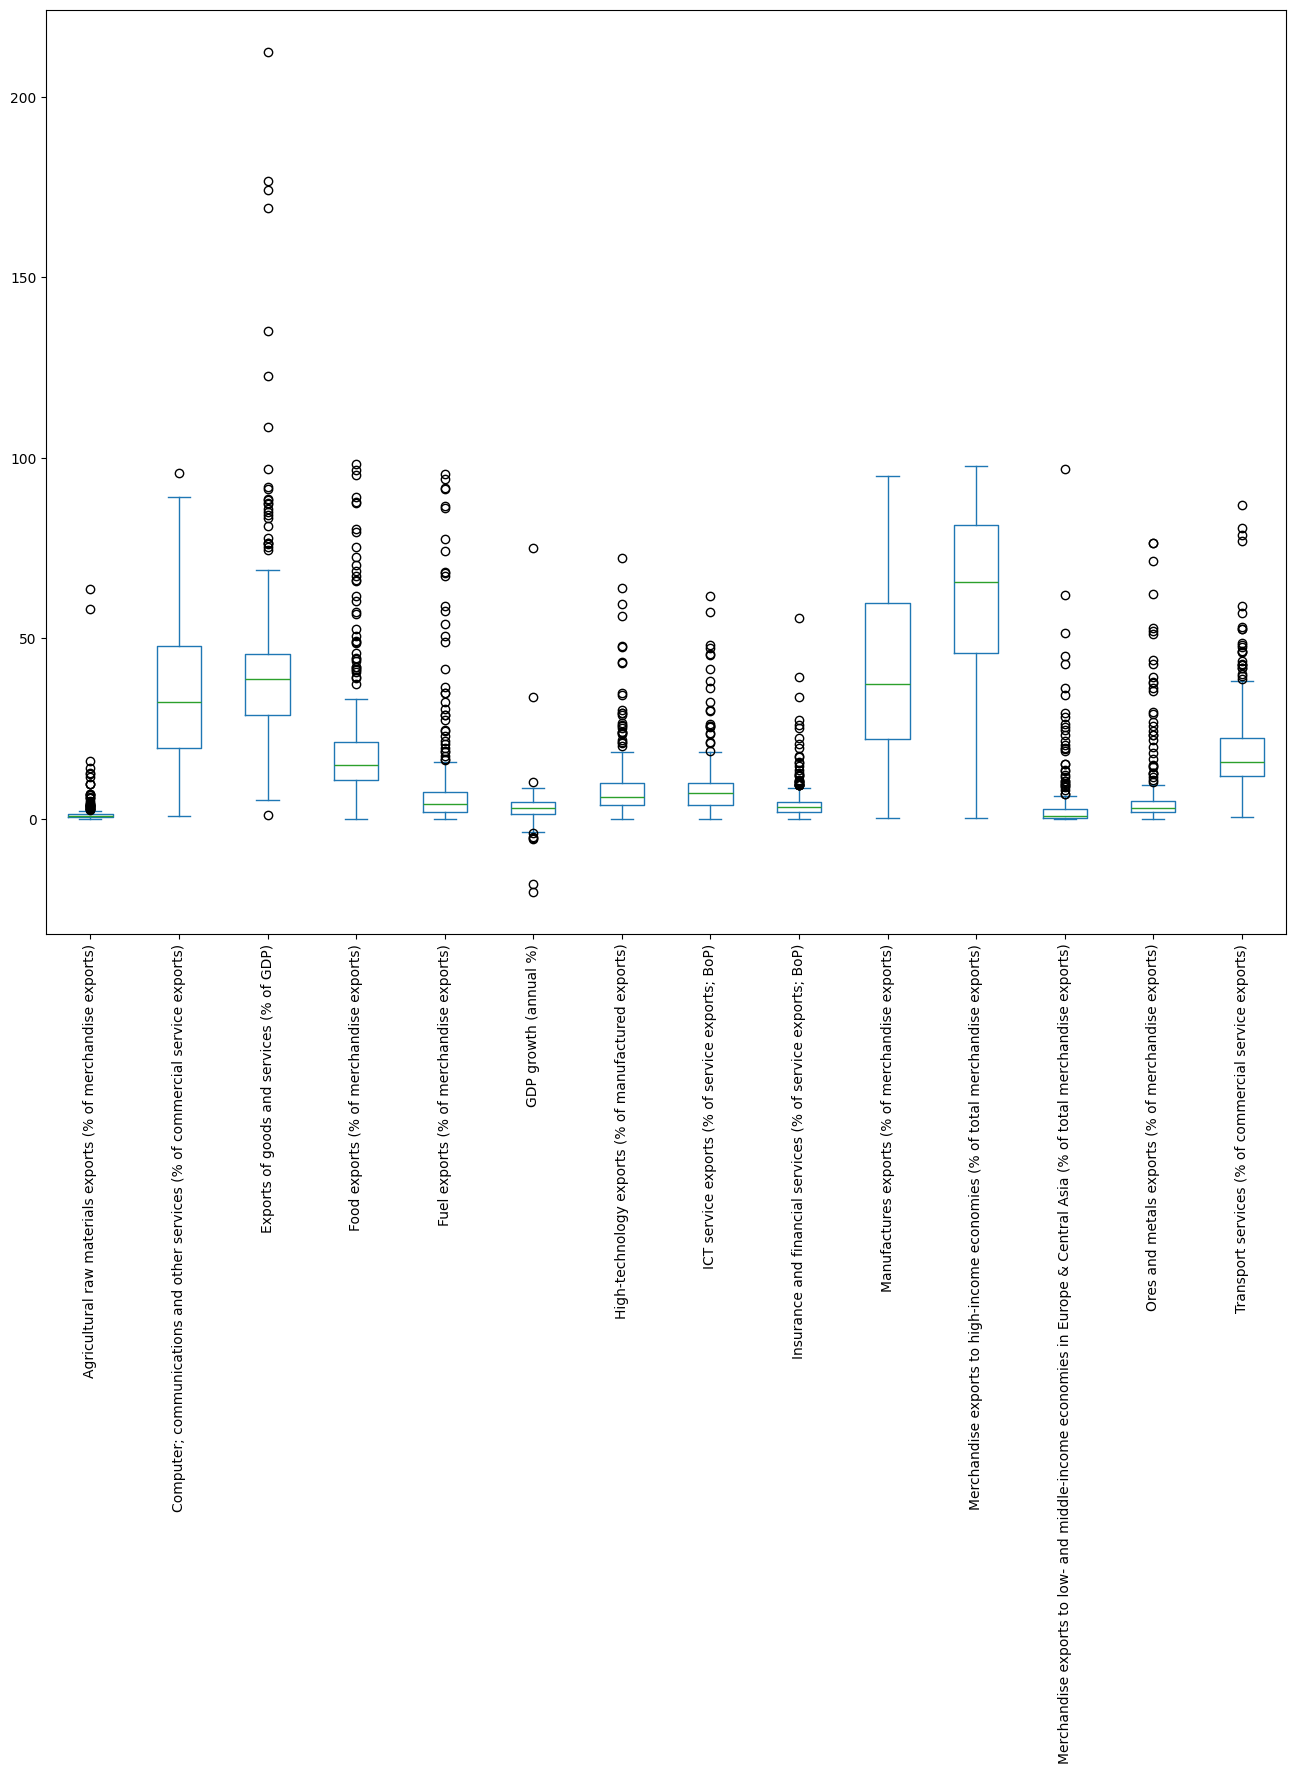

In [ ]:
df.plot(kind="box", figsize=(16,12))
plt.xticks(rotation=90)
plt.show()





---


Con el BoxPlot se identifican las observaciones que se encuentran fuera de la caja de cuartiles, encontrando outliers para cada variable. Estos outliers se deben eliminar debido a que constituyen datos atípicos en la muestra de datos, lo cual puede sesgar los futuros análisis al no ser representativos de la población que queremos analizar.

En varias variables, estos datos atípicos son bastantes, por lo que se aplicará un criterio para cada una de ellas al eliminar dichos outliers. Se eliminarán las más alejadas a la "caja de bigotes", no todas sino sólo las más extremas, esto para no disminuir demasiado la muestra de países.

---


In [ ]:
df=df[df["Agricultural raw materials exports (% of merchandise exports)"]<50]
#no cambia --> Computer; communications and other services (% of commercial service exports)
df=df[df["Exports of goods and services (% of GDP)"]<100]
df=df[df["Food exports (% of merchandise exports)"]<75]
df=df[df["Fuel exports (% of merchandise exports)"]<60]
df=df[df["GDP growth (annual %)"]<75]
df=df[df["High-technology exports (% of manufactured exports)"]<40]
df=df[df["ICT service exports (% of service exports; BoP)"]<45]
df=df[df["Insurance and financial services (% of service exports; BoP)"]<35]
#no cambia --> Manufactures exports (% of merchandise exports)
#no cambia --> Merchandise exports to high-income economies (% of total merchandise exports)
df=df[df["Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)"]<40]
df=df[df["Ores and metals exports (% of merchandise exports)"]<55]
df=df[df["Transport services (% of commercial service exports)"]<65]

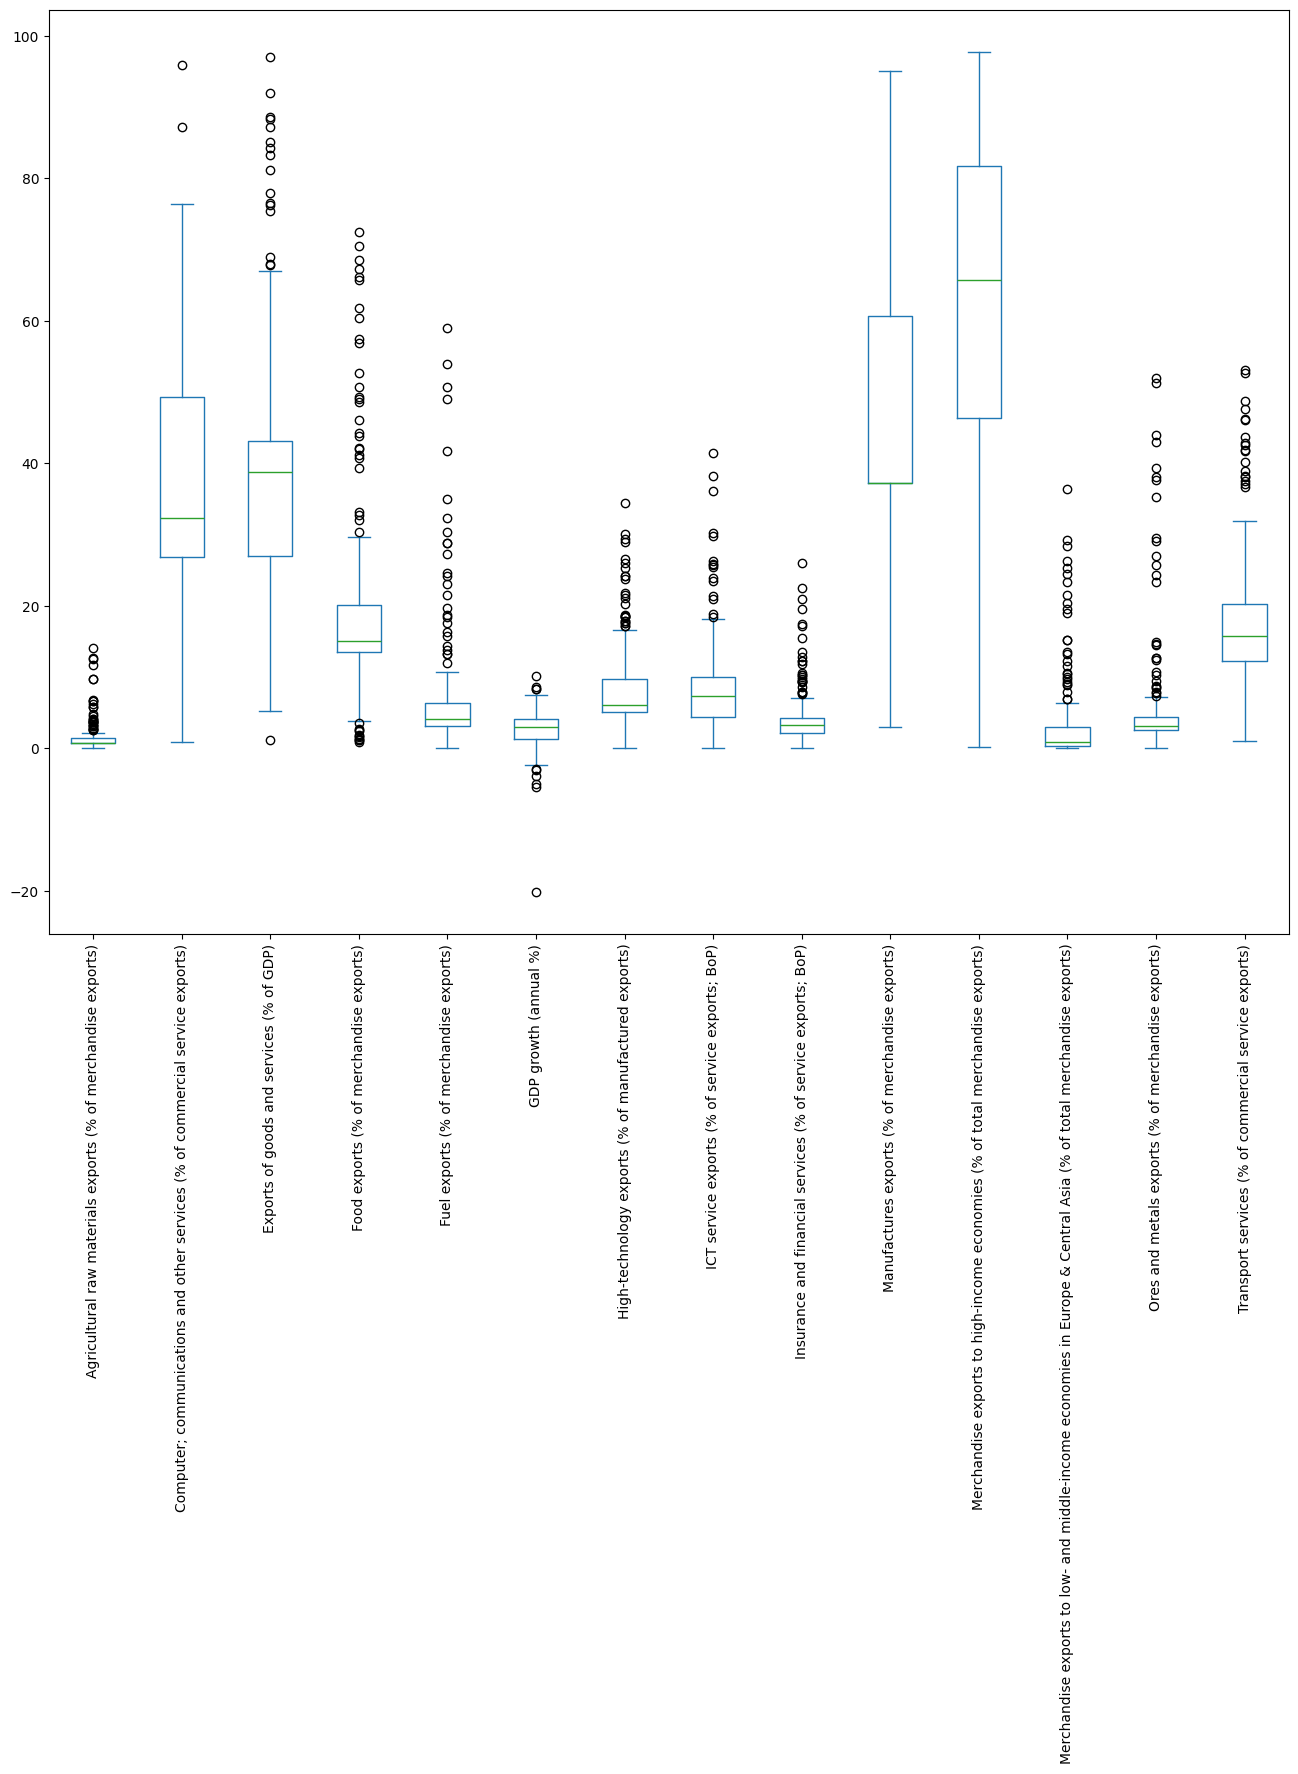

Series Name,Agricultural raw materials exports (% of merchandise exports),Computer; communications and other services (% of commercial service exports),Exports of goods and services (% of GDP),Food exports (% of merchandise exports),Fuel exports (% of merchandise exports),GDP growth (annual %),High-technology exports (% of manufactured exports),ICT service exports (% of service exports; BoP),Insurance and financial services (% of service exports; BoP),Manufactures exports (% of merchandise exports),Merchandise exports to high-income economies (% of total merchandise exports),Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports),Ores and metals exports (% of merchandise exports),Transport services (% of commercial service exports)
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,1.676762,35.488330,38.940622,19.817289,7.221840,2.598662,8.249256,8.796211,4.294306,43.870146,62.134386,3.585614,6.235489,17.789079
std,2.367565,18.410812,18.866031,15.155311,10.135907,2.991065,6.808097,7.153372,4.251136,21.884167,23.567571,6.523263,9.583621,10.841965
min,0.002311,0.935706,1.108109,0.942336,0.000000,-20.111576,0.013825,0.088478,0.008135,3.035028,0.121224,0.000041,0.033884,0.963665
25%,0.783171,26.805846,26.978088,13.535583,3.096371,1.352204,5.041915,4.346245,2.141802,37.251121,46.313413,0.300546,2.499749,12.304299
50%,0.794963,32.273353,38.790357,15.056512,4.097826,2.960181,6.030929,7.285006,3.203366,37.251121,65.682415,0.942470,3.138350,15.739129
75%,1.406213,49.306537,43.162665,20.167058,6.276684,4.096910,9.682302,9.944111,4.305742,60.707631,81.677556,2.916948,4.390392,20.246358
max,14.085380,95.860793,97.018828,72.505340,58.930503,10.155818,34.429337,41.464884,25.964575,94.990393,97.770966,36.365369,52.002700,53.080877


In [ ]:
df.plot(kind="box", figsize=(16,12))
plt.xticks(rotation=90)
plt.show()
df.describe()

## Feature Engineering


### Pregunta 2.6

Realice _feature engineering_ de las variables numéricas (para luego entrenar un modelo _K-Means_ con estas). Realice los ajustes que estime conveniente, pero su tratamiento debe incluir por lo menos estandarización de las variables.

Más adelante se le pedirá comentar sobre los resultados de sus modelos, por lo que considere que sus decisiones podrían condicionar futuras preguntas.



In [ ]:
print(df.columns.tolist())

['Country Name', 'Agricultural raw materials exports (% of merchandise exports)', 'Computer; communications and other services (% of commercial service exports)', 'Exports of goods and services (% of GDP)', 'Food exports (% of merchandise exports)', 'Fuel exports (% of merchandise exports)', 'GDP growth (annual %)', 'High-technology exports (% of manufactured exports)', 'ICT service exports (% of service exports; BoP)', 'Insurance and financial services (% of service exports; BoP)', 'Manufactures exports (% of merchandise exports)', 'Merchandise exports to high-income economies (% of total merchandise exports)', 'Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)', 'Ores and metals exports (% of merchandise exports)', 'Transport services (% of commercial service exports)']


In [ ]:
#estandarizar
df_numeric = df.select_dtypes(include=['number'])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfe_numeric = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns, index=df.index)

___

Previamente, fueron analizados los outliers y data faltante. Se procede a estandarizar todas las variables numéricas.


___

## K-Means

### Pregunta 2.7

Considerando el dataframe completo (todas sus columnas atributos), determine el número óptimo de clusters mediante el "Elbow method". Considere un rango $k \in [1, 30]$. Describa el comportamiento observado de la curva.



In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

Text(0.5, 1.0, 'Elbow curve')

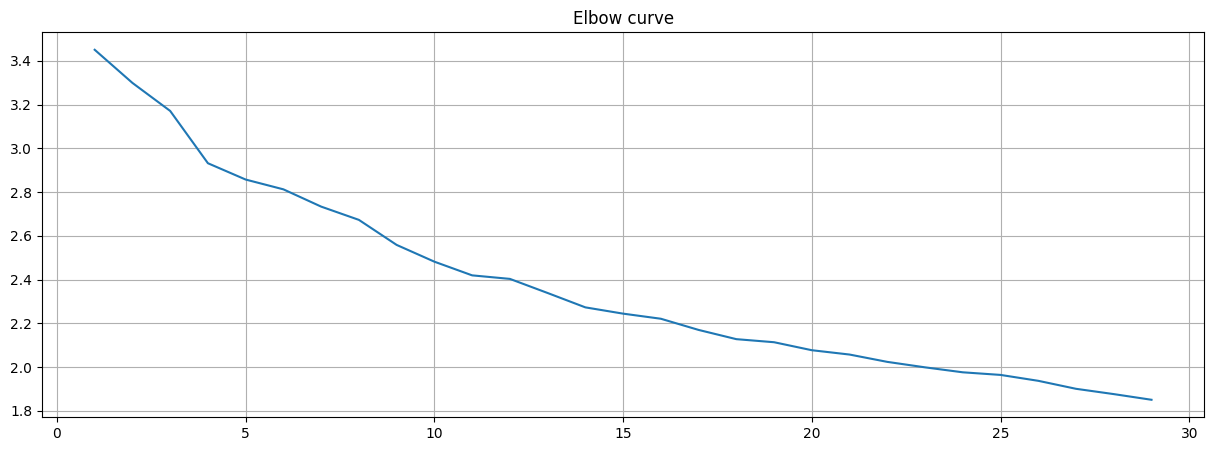

In [ ]:
dispersion = []
for k in range(1, 30):
  model = KMeans(n_clusters=k, random_state=42)  # fijar la semilla para que no cambie un poco el k* cuando se corra el codigo
  model.fit(dfe_numeric)
  #Distancia euclidiana para cada par (dato - centro del cluster)
  dist_ecl = cdist(dfe_numeric, model.cluster_centers_, 'euclidean')
  #Tomamos la distancia mínima (al centroide más cercano)
  min_dist = np.min(dist_ecl, axis=1)
  #Promediamos: sumamos todas las mínimas distincia y dividimos por la cantidad de datos
  average_dis = sum(min_dist)/len(dfe_numeric)
  dispersion.append(average_dis)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 30), dispersion)
plt.grid(True)
plt.title('Elbow curve')




---


El número óptimo de clusters es K=11.


En la curva podemos observar que de K=1 a K=11 existe la mayor ganancia en términos de disminución de dispersión. Luego en adelante (K>11) comienza a disminuir marginalmente muy poco la dispersión, lo vemos debido a que la curva muestra una pendiente bastante menor luego del K mencionado.

---


### Pregunta 2.8

Un problema habitual del modelo _K-Means_ es que pierde desempeño a mayor dimensionalidad.

En esta pregunta defina **por lo menos 5 combinaciones de columnas** (mínimo 2 columnas y máximo 4). Para cada combinación determine el número óptimo de clusters mediante el "Elbow method" considerando $k \in [1, 30]$.

Un posible enfoque para lo anterior es tomar un _approach_ estadístico y escoger variables que empíricamente muestran mayores indicios de poder diferenciador entre las observaciones. De todas formas, recuerde que la pregunta de interés es "¿qué países se verán expuestos de forma similar a la guerra comercial?". En este sentido, es altamente recomendable escoger variables con una mayor relación al fenómeno de la guerra comercial, ya que puede ser útil para discernir de qué forma podría verse expuesto cada grupo.


____


Una guerra comercial se caracteriza cuando países comienzan a prohibirse entre sí el libre comercio, ya sea con aumento de tafrifas arancelarias a las  importaciones o derechamente la prohibición de aquello. En vías de lo comentado, es posble definir combinaciones de columnas de la base de datos, que agrupadas parecieran constituir una variable relevante para responder la pregunta de interés.

Mterias primas: *Fuel exports (% of merchandise exports)*; *Agricultural raw materials exports (% of merchandise exports)*; *Ores and metals exports (% of merchandise exports)*

Tecnología y comunicación: *High-technology exports (% of manufactured exports)*; *ICT service exports (% of service exports; BoP)*; *Transport services (% of commercial service exports*); *Computer; communications and other services (% of commercial service exports)*

Destino de exportaciones: *Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)*; *Merchandise exports to high-income economies (% of total merchandise exports)*

Industrias y producto: *Manufactures exports (% of merchandise exports)*; *Food exports (% of merchandise exports)*; *Exports of goods and services (% of GDP)*; *GDP growth (annual %)*

BoP y PIB: *Insurance and financial services (% of service exports; BoP)*; *ICT service exports (% of service exports; BoP)*; *GDP growth (annual %)*


____

In [ ]:
#combinaciones
c1= ['Fuel exports (% of merchandise exports)', 'Agricultural raw materials exports (% of merchandise exports)', 'Ores and metals exports (% of merchandise exports)']
c2= ['High-technology exports (% of manufactured exports)', 'ICT service exports (% of service exports; BoP)', 'Transport services (% of commercial service exports)', 'Computer; communications and other services (% of commercial service exports)']
c3= ['Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)', 'Merchandise exports to high-income economies (% of total merchandise exports)']
c4= ['Manufactures exports (% of merchandise exports)', 'Food exports (% of merchandise exports)', 'Exports of goods and services (% of GDP)', 'GDP growth (annual %)']
c5= ['Insurance and financial services (% of service exports; BoP)', 'ICT service exports (% of service exports; BoP)', 'GDP growth (annual %)']

df1 = dfe_numeric[c1]
df2 = dfe_numeric[c2]
df3 = dfe_numeric[c3]
df4 = dfe_numeric[c4]
df5 = dfe_numeric[c5]

Text(0.5, 1.0, 'Elbow curve c5')

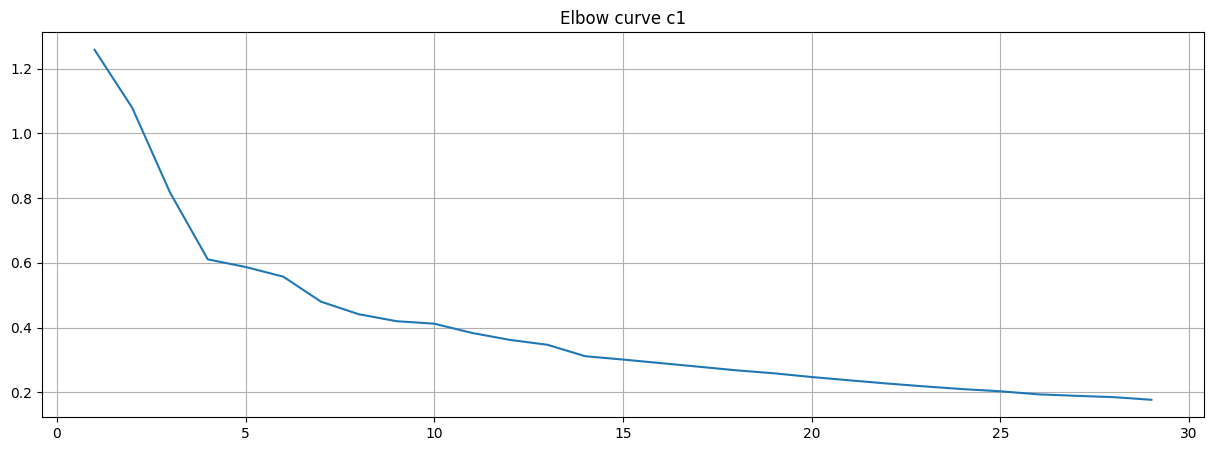

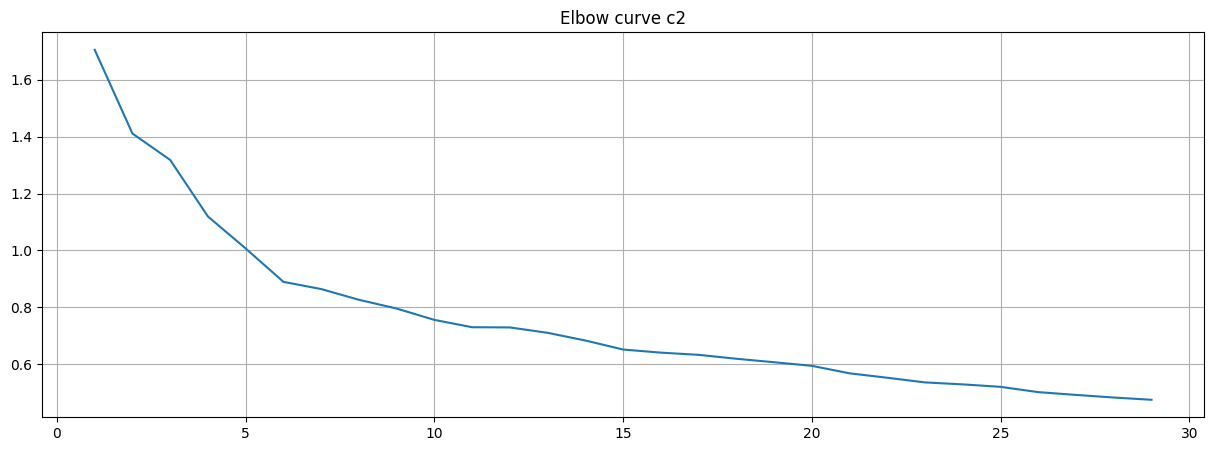

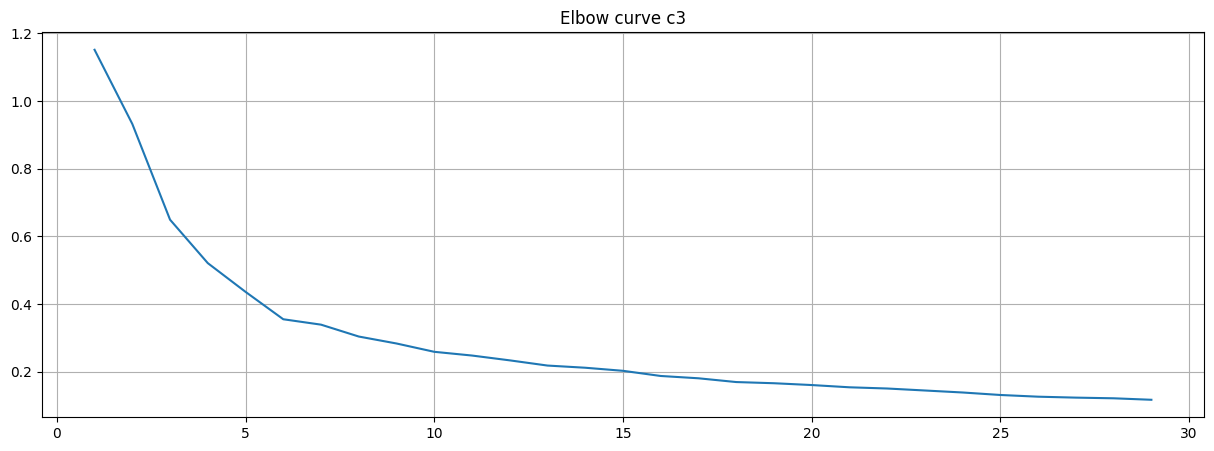

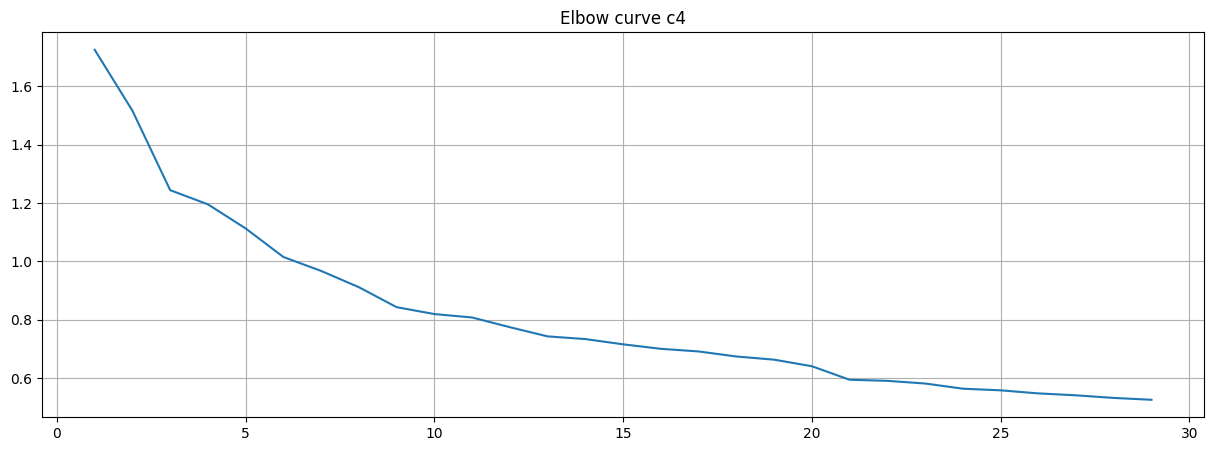

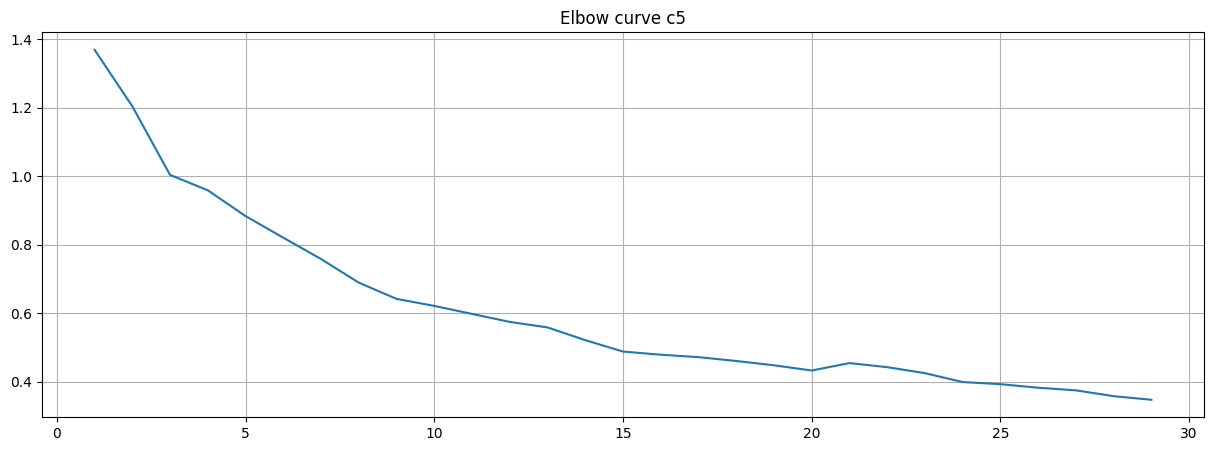

In [ ]:
dispersion = []
for k in range(1, 30):
  model = KMeans(n_clusters=k, random_state=42)  # fijar la semilla para que siempre me salga el mismo K*
  model.fit(df1)
  #Distancia euclidiana para cada par (dato - centro del cluster)
  dist_ecl = cdist(df1, model.cluster_centers_, 'euclidean')
  #Tomamos la distancia mínima (al centroide más cercano)
  min_dist = np.min(dist_ecl, axis=1)
  #Promediamos: sumamos todas las mínimas distincia y dividimos por la cantidad de datos
  average_dis = sum(min_dist)/len(df1)
  dispersion.append(average_dis)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 30), dispersion)
plt.grid(True)
plt.title('Elbow curve c1')
################################
dispersion = []
for k in range(1, 30):
  model = KMeans(n_clusters=k, random_state=42)  # fijar la semilla para que siempre me salga el mismo K*
  model.fit(df2)
  #Distancia euclidiana para cada par (dato - centro del cluster)
  dist_ecl = cdist(df2, model.cluster_centers_, 'euclidean')
  #Tomamos la distancia mínima (al centroide más cercano)
  min_dist = np.min(dist_ecl, axis=1)
  #Promediamos: sumamos todas las mínimas distincia y dividimos por la cantidad de datos
  average_dis = sum(min_dist)/len(df2)
  dispersion.append(average_dis)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 30), dispersion)
plt.grid(True)
plt.title('Elbow curve c2')
################################
dispersion = []
for k in range(1, 30):
  model = KMeans(n_clusters=k, random_state=42)  # fijar la semilla para que siempre me salga el mismo K*
  model.fit(df3)
  #Distancia euclidiana para cada par (dato - centro del cluster)
  dist_ecl = cdist(df3, model.cluster_centers_, 'euclidean')
  #Tomamos la distancia mínima (al centroide más cercano)
  min_dist = np.min(dist_ecl, axis=1)
  #Promediamos: sumamos todas las mínimas distincia y dividimos por la cantidad de datos
  average_dis = sum(min_dist)/len(df3)
  dispersion.append(average_dis)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 30), dispersion)
plt.grid(True)
plt.title('Elbow curve c3')
#################################
dispersion = []
for k in range(1, 30):
  model = KMeans(n_clusters=k, random_state=42)  # fijar la semilla para que siempre me salga el mismo K*
  model.fit(df4)
  #Distancia euclidiana para cada par (dato - centro del cluster)
  dist_ecl = cdist(df4, model.cluster_centers_, 'euclidean')
  #Tomamos la distancia mínima (al centroide más cercano)
  min_dist = np.min(dist_ecl, axis=1)
  #Promediamos: sumamos todas las mínimas distincia y dividimos por la cantidad de datos
  average_dis = sum(min_dist)/len(df4)
  dispersion.append(average_dis)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 30), dispersion)
plt.grid(True)
plt.title('Elbow curve c4')
#################################
dispersion = []
for k in range(1, 30):
  model = KMeans(n_clusters=k, random_state=42)  # fijar la semilla para que siempre me salga el mismo K*
  model.fit(df5)
  #Distancia euclidiana para cada par (dato - centro del cluster)
  dist_ecl = cdist(df5, model.cluster_centers_, 'euclidean')
  #Tomamos la distancia mínima (al centroide más cercano)
  min_dist = np.min(dist_ecl, axis=1)
  #Promediamos: sumamos todas las mínimas distincia y dividimos por la cantidad de datos
  average_dis = sum(min_dist)/len(df5)
  dispersion.append(average_dis)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 30), dispersion)
plt.grid(True)
plt.title('Elbow curve c5')


### Pregunta 2.9

Escoja la combinación de columnas que considera adecuada emplear, refiriéndose tanto al comportamiento observado de la curva, como al nivel de la métrica empleada al que se alcanza la convergencia.

Estime el modelo con $k$ óptimo y las columnas escogidas. Visualice los grupos graficando _scatterplots_. Considere gráficos en 3 dimensiones si su modelo posee 3 o más variables.

Describa en qué se diferencian los grupos encontrados y de qué manera le podría afectar la guerra comercial a cada uno. Liste una pequeña muestra representativa de los países que contiene cada grupo.


---

Se utilizará *Destino de exportaciones* (C3). Esto debido a que el gráfico evidencia en K*=6: un claro cambio en pendiente, de ahí en adelante la  reducción es marginalmente cada vez menor; uno de los niveles de dispersión más baja entre todas las combinaciones de columnas en el punto K óptimo.


---

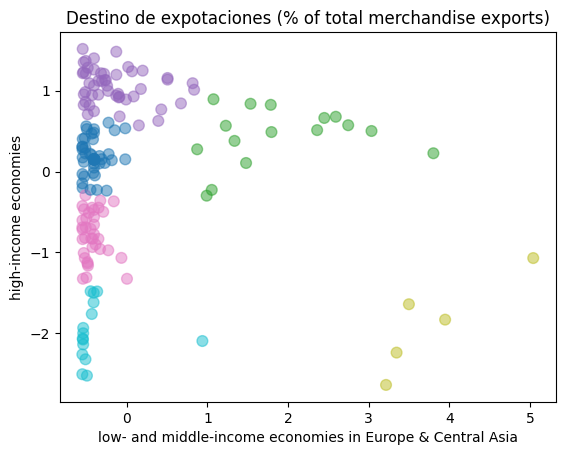

In [ ]:
#Definir modelo
model = KMeans(n_clusters=6, random_state=42)
#Entrenar modelo
model.fit_predict(df3)
#gráfico
color = np.where(model.labels_ == 0,'navy',np.where(model.labels_ ==1 ,'turquoise','darkorange'))
plt.scatter(df3['Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)'],
            df3['Merchandise exports to high-income economies (% of total merchandise exports)'],
            c=model.labels_, cmap='tab10', s=60, alpha=0.5)
plt.title('Destino de expotaciones (% of total merchandise exports)')
plt.xlabel('low- and middle-income economies in Europe & Central Asia')
plt.ylabel('high-income economies')
plt.show()


---


Existen 3 grupos de países con bajo nivel en la variable Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports), y con diferencias en la segunda vairable, se obervan estos tres bloques diferenciados en esta última. Existe otro grupo con medio-alto nivel en la variable vertical y nivel medio en la variable horizontal. Por último, un grupo con niveles bajos en la variable vertical, y con los valores más alto en la horizontal.

---

In [ ]:
#Codificar cada país con su respectivo k en df
dfe_numeric_copy = dfe_numeric.copy()
dfe_numeric_copy['Cluster'] = model.labels_

In [ ]:
from scipy.spatial.distance import cdist

#SUPUESTO: "más representativos" hace referencia a los más cercanos al centroide de cada cluster
centroides = model.cluster_centers_
distancias = cdist(df3.values, centroides, metric='euclidean')

dfe_numeric_copy['Distancia_al_centroide'] = [distancias[i, cluster] for i, cluster in enumerate(dfe_numeric_copy['Cluster'])] #dist

dfe_numeric_copy['Country Name'] = df['Country Name'].values

#listado
for c in range(6):
    print(f"\nCluster {c}")
    muestra = dfe_numeric_copy[dfe_numeric_copy['Cluster'] == c].nsmallest(5, 'Distancia_al_centroide')['Country Name'].tolist()
    print(", ".join(muestra))


Cluster 0
Viet Nam, Andorra, British Virgin Islands, Channel Islands, Isle of Man

Cluster 1
Bulgaria, North Macedonia, Serbia, Kazakhstan, Lithuania

Cluster 2
Denmark, Libya, Finland, United Kingdom, Belgium

Cluster 3
Aruba, Gabon, Indonesia, Uganda, Brazil

Cluster 4
Iran, Russian Federation, Turkmenistan, Yemen, Uzbekistan

Cluster 5
Micronesia, Nauru, Guam, Lao PDR, Eritrea


## PCA

_PCA_ es una técnica de reducción de dimensionalidad que nos permite trabajar sobre un set de componentes principales ortogonales (mayor facilidad para los modelos a la hora de detectar patrones), además de permitirnos visualizar espacios multidimensionales, quedándonos sobre el espacio de PCA.



### Pregunta 2.10

Utilizando todas las variables originales y $k$ óptimo escogido en la pregunta anterior, estime un PCA con 2 componentes principales. Luego, estime un modelo _K-Means_ sobre los componentes principales obtenidos. Grafique las observaciones en un _scatterplot_ de 2 dimensiones. Coloree los puntos usando los label de los clusters obtenidos.

¿Cuáles son las principales diferencias entre los grupos? Encuentre las variables más definitivas a la hora de agrupar países con los 2 primeros componentes principales.


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
#PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(dfe_numeric)
var_exp = pca.explained_variance_ratio_

In [ ]:
#relacion de vairiables y magnitudes pca
variables_pca = pd.DataFrame(pca.components_.T, index=dfe_numeric.columns,columns=['PC1', 'PC2'] )

print(variables_pca)

                                                         PC1       PC2
Series Name                                                           
Agricultural raw materials exports (% of mercha... -0.060449  0.159664
Computer; communications and other services (% ...  0.354434  0.027735
Exports of goods and services (% of GDP)            0.307915 -0.040459
Food exports (% of merchandise exports)            -0.294033 -0.094336
Fuel exports (% of merchandise exports)            -0.016814  0.566981
GDP growth (annual %)                              -0.204894  0.034720
High-technology exports (% of manufactured expo...  0.391456  0.314993
ICT service exports (% of service exports; BoP)     0.293087  0.115129
Insurance and financial services (% of service ...  0.161371  0.425018
Manufactures exports (% of merchandise exports)     0.457645 -0.267113
Merchandise exports to high-income economies (%...  0.339942 -0.065179
Merchandise exports to low- and middle-income e...  0.097809  0.068716
Ores a

In [ ]:
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])


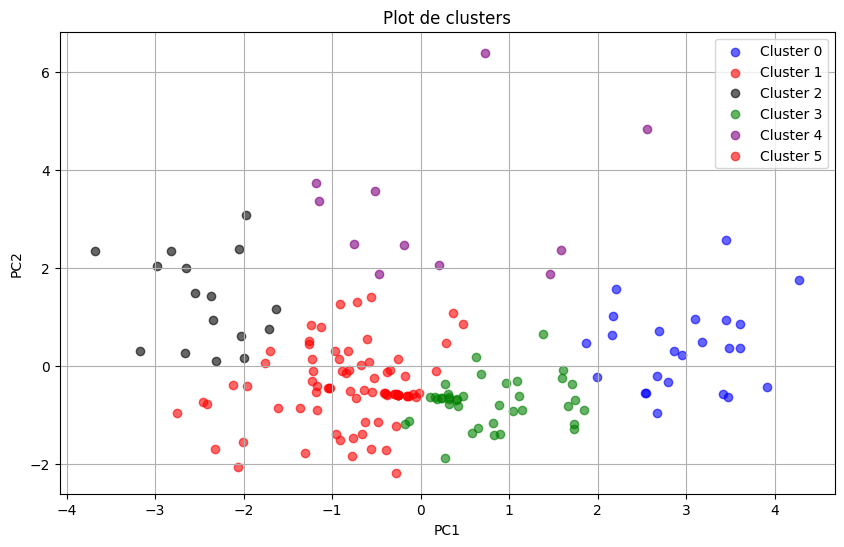

In [ ]:
#K-means
model = KMeans(n_clusters=6)
model.fit(df_pca)

#gráfico
colors = ['blue', 'red', 'black', 'green', 'purple', 'red']
labels = model.labels_

plt.figure(figsize=(10, 6))
for i in range(6):
    plt.scatter(
        df_pca[labels == i]['PC1'],
        df_pca[labels == i]['PC2'],
        color=colors[i],
        alpha=0.6,
        label=f'Cluster {i}'
    )

plt.title('Plot de clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

---


Existen cuatro grandes grupos que se diferencian en magnitud de PC1 y por tener baja magnitud en PC2. Cluster 0 y 3  se caracterizan por nivel elevado de magnitud en PC2 y un nivel bajo y medio en PC1, respectivamente.
También, tenemos las variables más definitivas para PCA en términos absolutos. PCA1: Manufactures exports (% of merchandise exports); High-technology exports; y Computer; communications and other services. Para PC2: Fuel exports (% of merchandise exports); Insurance and financial services;  Ores and metals exports (% of merchandise exports).

---

### Pregunta 2.11


Repita lo anterior  (descripción incluida), pero con 3 componentes principales y un _scatterplot_ en 3 dimensiones.

In [ ]:
#PCA
pca = PCA(n_components=3)
df_pca3 = pca.fit_transform(dfe_numeric)
var_exp = pca.explained_variance_ratio_


df_pca3 = pd.DataFrame(df_pca3, columns=['PC1', 'PC2', 'PC3'])


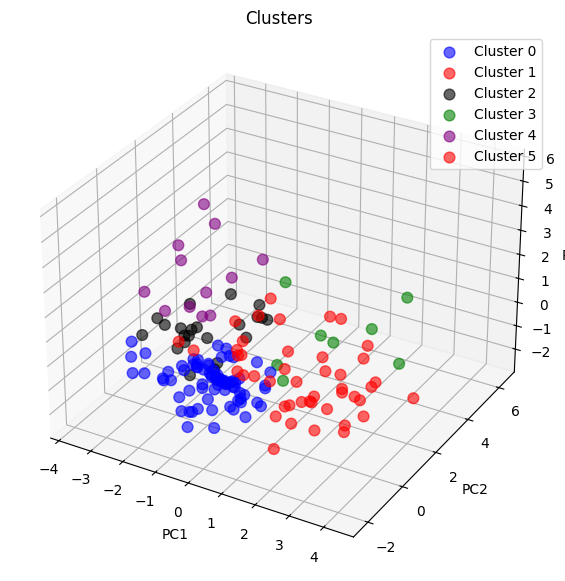

In [ ]:
#K-means
model = KMeans(n_clusters=6)
labels = model.fit_predict(df_pca3)
df_pca3['Cluster'] = labels

#gráfico
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for i in range(6):
    cluster_data = df_pca3[df_pca3['Cluster'] == i]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'],cluster_data['PC3'],color=colors[i],label=f'Cluster {i}', alpha=0.6,s=60)

ax.set_title('Clusters')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

In [ ]:
variables_pca2 = pd.DataFrame(pca.components_.T, index=dfe_numeric.columns,columns=['PC1', 'PC2', 'PC3'] )

print(variables_pca2)

                                                         PC1       PC2  \
Series Name                                                              
Agricultural raw materials exports (% of mercha... -0.060449  0.159664   
Computer; communications and other services (% ...  0.354434  0.027735   
Exports of goods and services (% of GDP)            0.307915 -0.040459   
Food exports (% of merchandise exports)            -0.294033 -0.094336   
Fuel exports (% of merchandise exports)            -0.016814  0.566981   
GDP growth (annual %)                              -0.204894  0.034720   
High-technology exports (% of manufactured expo...  0.391456  0.314993   
ICT service exports (% of service exports; BoP)     0.293087  0.115129   
Insurance and financial services (% of service ...  0.161371  0.425018   
Manufactures exports (% of merchandise exports)     0.457645 -0.267113   
Merchandise exports to high-income economies (%...  0.339942 -0.065179   
Merchandise exports to low- and middle

---


Las variables con mayor importancia para PCA con 3 componentes son los siguientes. PCA1: Computer; communications and other services; Manufactures exports (% of merchandise exports). PCA2: Fuel exports (% of merchandise exports) ; Insurance and financial services. PCA3: Agricultural raw materials exports; ICT service exports.

---

### Pregunta 2.12

Otro de los usos de los más comúnes de _PCA_, además de _feature engineering_, es la visualización. En esta sección utilizaremos _PCA_ para confirmar visualmente que estamos clusterizando países similares.

Usando el diccionario en la celda de abajo agrega una columna de continente al _dataframe_ de trabajo.

In [ ]:
country_continent_mapping = {
    'Albania': 'Europe',
    'Argentina': 'South America',
    'Armenia': 'Asia',
    'Aruba': 'North America', # Usually classified with the Caribbean
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Azerbaijan': 'Asia',
    'Bahrain': 'Asia',
    'Belgium': 'Europe',
    'Belize': 'North America',
    'Bolivia': 'South America',
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Brazil': 'South America',
    'Brunei Darussalam': 'Asia',
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa',
    'Cabo Verde': 'Africa',
    'Canada': 'North America',
    'Chile': 'South America',
    'China': 'Asia',
    'Colombia': 'South America',
    'Congo Dem. Rep.': 'Africa',
    'Costa Rica': 'North America',
    'Croatia': 'Europe',
    'Cyprus': 'Asia',
    'Czechia': 'Europe',
    'Denmark': 'Europe',
    'Dominican Republic': 'North America',
    'Ecuador': 'South America',
    'Egypt': 'Africa', # Transcontinental, but usually Africa
    'El Salvador': 'North America',
    'Estonia': 'Europe',
    'Ethiopia': 'Africa',
    'Finland': 'Europe',
    'France': 'Europe',
    'Gambia': 'Africa',
    'Georgia': 'Asia',
    'Germany': 'Europe',
    'Ghana': 'Africa',
    'Greece': 'Europe',
    'Guatemala': 'North America',
    'Honduras': 'North America',
    'Hong Kong': 'Asia',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Ireland': 'Europe',
    'Italy': 'Europe',
    'Japan': 'Asia',
    'Jordan': 'Asia',
    'Kazakhstan': 'Asia', # Transcontinental, mostly Asia
    'Kenya': 'Africa',
    'Korea Rep.': 'Asia',
    'Latvia': 'Europe',
    'Lesotho': 'Africa',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Macao': 'Asia',
    'Malaysia': 'Asia',
    'Malta': 'Europe',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Mexico': 'North America',
    'Moldova': 'Europe',
    'Montenegro': 'Europe',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Namibia': 'Africa',
    'Netherlands': 'Europe',
    'New Zealand': 'Oceania',
    'Nicaragua': 'North America',
    'Niger': 'Africa',
    'North Macedonia': 'Europe',
    'Norway': 'Europe',
    'Pakistan': 'Asia',
    'Panama': 'North America',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Romania': 'Europe',
    'Samoa': 'Oceania',
    'Saudi Arabia': 'Asia',
    'Senegal': 'Africa',
    'Singapore': 'Asia',
    'Slovak Republic': 'Europe',
    'Slovenia': 'Europe',
    'South Africa': 'Africa',
    'Spain': 'Europe',
    'Sri Lanka': 'Asia',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Tanzania': 'Africa',
    'Thailand': 'Asia',
    'Timor-Leste': 'Asia',
    'Tunisia': 'Africa',
    'Turkiye': 'Asia', # Transcontinental, mostly Asia
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'United Kingdom': 'Europe',
    'United States': 'North America',
    'Uruguay': 'South America',
    'Uzbekistan': 'Asia',
    'Zambia': 'Africa'
}


In [ ]:
dfe_numeric = dfe_numeric.copy()
dfe_numeric['Country Name'] = df['Country Name']

In [ ]:
#concatenación
dfe_numeric['Continent'] = dfe_numeric['Country Name'].map(country_continent_mapping)

In [ ]:
#dfe_numeric.head()

### Pregunta 2.13

Realice un PCA de 2 componentes principales, grafique un _scatterplot_ del resultado y coloree cada punto según su continente. ¿Que se obserba?


In [ ]:
#variables numeric
df2 = dfe_numeric.drop(['Country Name', 'Continent'], axis=1)


#pca de 2 componentes
pca = PCA(n_components=2)
df2pca = pca.fit_transform(df2)

df22pca = pd.DataFrame(df2pca, columns=['PC1', 'PC2'])
df22pca['Continent'] = dfe_numeric['Continent'].values  #para concatenar con continentes

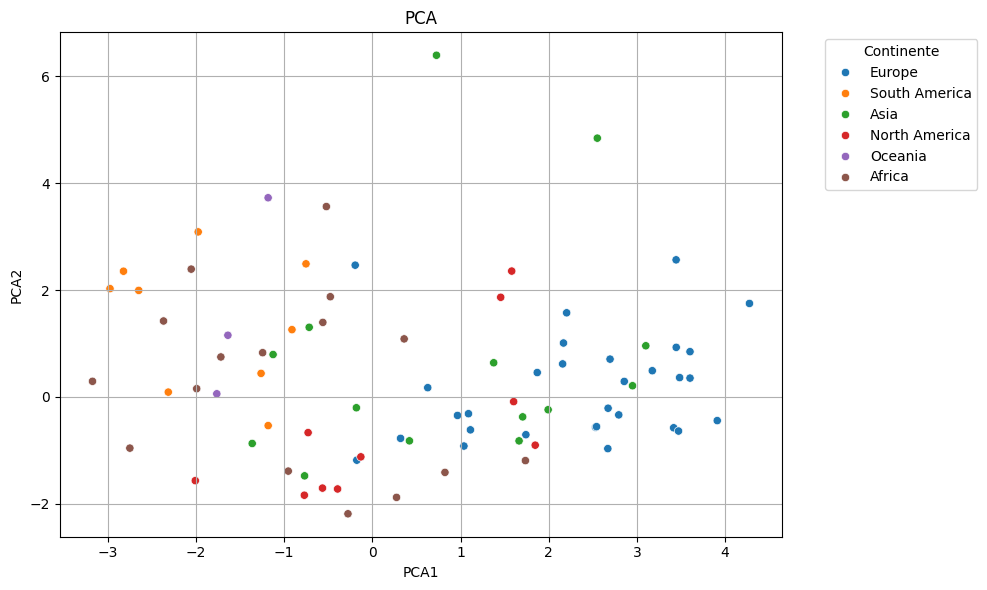

In [ ]:
#grafico
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df22pca, x='PC1', y='PC2', hue='Continent', palette='tab10')
plt.title('PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Continente', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
dfe_numeric['Continent'].value_counts()


,count
Continent,
Europe,30
Africa,16
Asia,14
North America,10
South America,9
Oceania,3


---


Se observa a Sudamérica en los recuadros inferiores a la izquierda. Europa claramente con un PCA1 avanzado, hace sentido si recordamos las variables relacionadas a dicho cuadrante mencionadas anteriormente. África en una posición más centrada que Sudamérica. Asia lo observamos claramente en una posición media de PCA1 y más inferior respecto a PCA2

Cabe mencionar que el diccionario de países no tiene todos los países de la base de datos original, por lo que hay una gran pérdida de variables. Esto puede desfavorecer la interpretación de los datos.

---

### Pregunta 2.14

Genera el mismo gráfico anterior, pero ahora coloree los puntos del scatterplot usando los clusters de un KMeans de 3 clústers y `random_state=42`. Describa los clusters según el gráfico.



                                                         PC1       PC2
Series Name                                                           
Agricultural raw materials exports (% of mercha... -0.060449  0.159664
Computer; communications and other services (% ...  0.354434  0.027735
Exports of goods and services (% of GDP)            0.307915 -0.040459
Food exports (% of merchandise exports)            -0.294033 -0.094336
Fuel exports (% of merchandise exports)            -0.016814  0.566981
GDP growth (annual %)                              -0.204894  0.034720
High-technology exports (% of manufactured expo...  0.391456  0.314993
ICT service exports (% of service exports; BoP)     0.293087  0.115129
Insurance and financial services (% of service ...  0.161371  0.425018
Manufactures exports (% of merchandise exports)     0.457645 -0.267113
Merchandise exports to high-income economies (%...  0.339942 -0.065179
Merchandise exports to low- and middle-income e...  0.097809  0.068716
Ores a

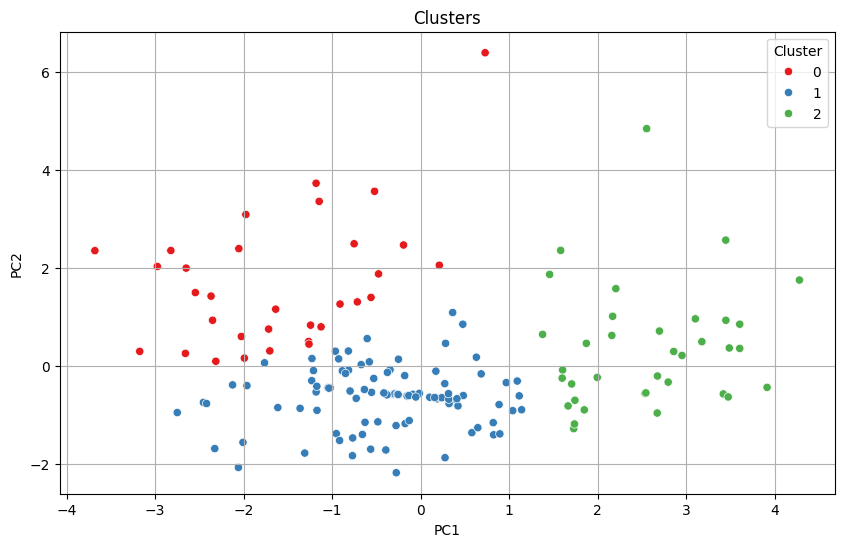

In [ ]:
#ya hice el pca
kmeans = KMeans(n_clusters=3, random_state=42)
df22pca['Cluster'] = kmeans.fit_predict(df22pca[['PC1', 'PC2']])

variables_pca3 = pd.DataFrame(pca.components_.T, index=df2.columns,columns=['PC1', 'PC2'] )

print(variables_pca3)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df22pca, x='PC1', y='PC2', hue='Cluster', palette='Set1')
plt.title('Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

---


El primer cluster (0) se caracteriza por altos niveles de Fuel exports e Insurance and financial services, pero bajos niveles de Manufactures exports y High-technology exports. El segundo, (1),  destaca en bajo Fuel exports e Insurance and financial services, niveles medios de Computer; communications and other services, y considerables nivles de Food exports (% of merchandise exports). El último (2) posee los mayores niveles en Manufactures exports ,High-technology exports, y Merchandise exports to high-income economies, y niveles medios en lo relacionado a PC2, es decir, Fuel exports e Insurance and financial services.

---

### Pregunta 2.15

¿Cual es la proporcion de cada cluster por continente?


In [ ]:
prop = pd.crosstab(df22pca['Continent'], df22pca['Cluster'], normalize='index').round(2)
print(prop)

Cluster           0     1     2
Continent                      
Africa         0.56  0.38  0.06
Asia           0.21  0.29  0.50
Europe         0.03  0.23  0.73
North America  0.00  0.60  0.40
Oceania        0.67  0.33  0.00
South America  0.89  0.11  0.00


### Pregunta 2.16

¿Cuál es la característica numérica más alta en magnitud por cluster (usando sus centroides)? ¿Cuál es su signo? ¿Como nos ayuda a interpretar los clusters? ¿Que podemos concluir de cada uno de estos clusters en contexto de la guerra comercial?


In [ ]:
centroides = pd.DataFrame(kmeans.cluster_centers_, columns=['PC1', 'PC2'])
#centroides


In [ ]:
for i in range(len(centroides)):
    fila = centroides.iloc[i]

    valor_pc1 = abs(fila['PC1'])  #sacamos v.a.
    valor_pc2 = abs(fila['PC2'])

    if valor_pc1 > valor_pc2:   #definir mayor
        variable = 'PC1'
        valor = fila['PC1']
    else:
        variable = 'PC2'
        valor = fila['PC2']

    if valor > 0:
        signo = 'positivo'
    else:
        signo = 'negativo'

    print("Cluster", i, ":", variable, "magnitud de", round(valor, 3))

Cluster 0 : PC2 magnitud de 1.69
Cluster 1 : PC2 magnitud de -0.648
Cluster 2 : PC1 magnitud de 2.545


---


Cluster 0 representa países intensivos en exportaciones de combustible y servicios financieros. Cluster 1 demuestra un bajo PC2, es decir lo opuesto al cluster 0. Por otro lado, el cluster 2 tiene un gran nivel en PC1 lo cual implica mayor exportación manufacturera y tecnológica, además de exportar hacia países de alto ingreso.

En un contexto de guerra comercial, países del cluster 2 parecen ser los menos expuestos. Lo contrario sucedería para países del cluster 0 y 2, aunque bien el efecto sobre ellos dependerá de la industria que más se vea afectada con aranceles y dificultades de comercio. Además, específicamente países del cluster 2 dependen directamente de grandes economías, quienes suelen protagonizar este tipo de guerras comerciales, en función de esto, podríamos señalar que representa a los países más expuestos ante el fenómeno comentado.

---